# Homework on Exploratory Data Analysis
# Data Science and Machine Learning, University of Tokyo
# Name : Hansen Hendra
# Student ID : 37205127

## Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Table of Contents:

* <font size="5">[USA DATA](#usa)</font><br><br>
    * <font size="3">[Load Data and Time Formatting](#usa_ld_tf)</font>
    * <font size="3">[Dealing with Missing Values](#usa_mf)</font>
    * <font size="3">[Finding Outlier Values](#usa_of)</font> <br>
    * <font size="3">[Pattern of Outlier Values](#usa_op)</font> <br><br>
    
    * <font size="3">[Plotting over time](#usa_nc)</font>
        * <font size="3">[Plotting Per City](#usa_nc_pc)</font>
        * <font size="3">[Plotting Per Goods Sector](#usa_nc_ps)</font><br><br>
        
    * <font size="3">[Correlation Between Goods](#usa_cg)</font>
    * <font size="3">[Boxplot](#usa_bp)</font><br><br>
    
    
* <font size="5">[CANADA DATA](#can)</font><br><br>
    * <font size="3">[Load Data and Time Formatting](#can_ld_tf)</font>
    * <font size="3">[Dealing with Missing Values](#can_mf)</font>
    * <font size="3">[Finding Outlier Values](#can_of)</font> <br><br>
    
    * <font size="3">[Plotting](#can_nc)</font>
        * <font size="3">[Plotting Per City](#can_nc_pc)</font>
        * <font size="3">[Plotting Per Goods Sector](#can_nc_ps)</font><br><br>

    * <font size="3">[Correlation Between Goods](#can_cg)</font>
    * <font size="3">[Boxplot](#can_bp)</font><br><br>

## USA DATA <a class="anchor" id="usa"></a>

### Load Data and Time Formatting <a class="anchor" id="usa_ld_tf"></a>

In [44]:
############## Load excel into pandas dataframe #################

usa_df = pd.read_excel('data/USA.xls')
# Removing Unknown Column , the last 15 columns is not named in the homework document
usa_df = usa_df[usa_df.columns[:-15]]
usa_df.head()

Unnamed: 0   CH0   CH1   CH2   CH3   CH4   CH5   CH6   CH7   CH8  ...   WA5  \
0    1976:01  53.7  65.0  58.8  73.3  44.0  47.0  64.6  94.3  96.9  ...  48.5   
1    1976:02  54.1  65.0  58.9  73.3  44.0  47.6  65.0  95.8  98.5  ...  49.5   
2    1976:03  54.2  64.3  59.3  73.5  44.0  48.5  65.4  97.1  98.5  ...  49.4   
3    1976:04  54.5  65.0  59.6  75.2  44.1  48.7  65.6  95.2  98.1  ...  49.0   
4    1976:05  54.8  64.7  59.8  75.2  44.3  49.1  65.5  97.2  98.3  ...  48.9   

       WA6      WA7      WA8      WA9     WA10     WA11     WA12     WA13  \
0 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
1   65.800   78.200   79.400   65.700   54.600   45.600   51.700   63.900   
2 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
3 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
4   66.500   82.500   82.800   66.900   56.400   46.500   52.600   64.700   

      WA14  
0 -999.999  
1   67.300  
2 -999.999  
3 -999.999  
4   68.300  

[5 rows x 211 columns]

In [45]:
usa_df

Unnamed: 0    CH0    CH1    CH2    CH3    CH4    CH5    CH6    CH7    CH8  \
0      1976:01   53.7   65.0   58.8   73.3   44.0   47.0   64.6   94.3   96.9   
1      1976:02   54.1   65.0   58.9   73.3   44.0   47.6   65.0   95.8   98.5   
2      1976:03   54.2   64.3   59.3   73.5   44.0   48.5   65.4   97.1   98.5   
3      1976:04   54.5   65.0   59.6   75.2   44.1   48.7   65.6   95.2   98.1   
4      1976:05   54.8   64.7   59.8   75.2   44.3   49.1   65.5   97.2   98.3   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
228    1995:01  151.8  155.9  138.2  159.2  170.9  116.8  118.2  127.6  115.1   
229    1995:02  152.3  157.5  138.0  162.1  171.8  114.5  117.7  121.9  126.8   
230    1995:03  152.6  156.7  139.0  162.8  172.7  112.3  117.1  126.7  126.3   
231    1995:04  153.1  157.3  138.9  163.7  173.6  111.6  118.1  124.8  125.3   
232    1995:05  153.0  155.8  139.4  162.8  174.2  110.8  118.3  126.9  118.4   

     ...      WA5      WA6      WA7      WA8      WA9     WA10     WA11  \
0    ...   48.500 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
1    ...   49.500   65.800   78.200   79.400   65.700   54.600   45.600   
2    ...   49.400 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
3    ...   49.000 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
4    ...   48.900   66.500   82.500   82.800   66.900   56.400   46.500   
..   ...      ...      ...      ...      ...      ...      ...      ...   
228  ...  121.700  135.200  135.400  122.600  139.000  141.700  139.000   
229  ... -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
230  ...  122.300  137.300  157.500  143.500  142.000  140.400  140.600   
231  ... -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
232  ...  122.900  134.600  149.700  131.800  135.600  141.900  136.400   

        WA12     WA13     WA14  
0   -999.999 -999.999 -999.999  
1     51.700   63.900   67.300  
2   -999.999 -999.999 -999.999  
3   -999.999 -999.999 -999.999  
4     52.600   64.700   68.300  
..       ...      ...      ...  
228  208.500  156.900  164.300  
229 -999.999 -999.999 -999.999  
230  209.000  156.900  163.200  
231 -999.999 -999.999 -999.999  
232  209.300  158.300  161.200  

[233 rows x 211 columns]

In [46]:
############## Time Formating #################

# rename the first column to appropriate name
usa_df=usa_df.rename(columns = {usa_df.columns[0]:'TIME'})
# convert the first columns into pandas datetime format
usa_df['TIME'] = pd.to_datetime(usa_df['TIME'], format='%Y:%m', errors='ignore')
# preview of %YYYY-%MM-%DD format
usa_df.head()

TIME   CH0   CH1   CH2   CH3   CH4   CH5   CH6   CH7   CH8  ...   WA5  \
0 1976-01-01  53.7  65.0  58.8  73.3  44.0  47.0  64.6  94.3  96.9  ...  48.5   
1 1976-02-01  54.1  65.0  58.9  73.3  44.0  47.6  65.0  95.8  98.5  ...  49.5   
2 1976-03-01  54.2  64.3  59.3  73.5  44.0  48.5  65.4  97.1  98.5  ...  49.4   
3 1976-04-01  54.5  65.0  59.6  75.2  44.1  48.7  65.6  95.2  98.1  ...  49.0   
4 1976-05-01  54.8  64.7  59.8  75.2  44.3  49.1  65.5  97.2  98.3  ...  48.9   

       WA6      WA7      WA8      WA9     WA10     WA11     WA12     WA13  \
0 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
1   65.800   78.200   79.400   65.700   54.600   45.600   51.700   63.900   
2 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
3 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
4   66.500   82.500   82.800   66.900   56.400   46.500   52.600   64.700   

      WA14  
0 -999.999  
1   67.300  
2 -999.999  
3 -999.999  
4   68.300  

[5 rows x 211 columns]

### Dealing with Missing Values <a class="anchor" id="usa_mf"></a>

In [47]:
# find the column with missing value
usa_df.columns[usa_df.isnull().any()]

Index(['MI0', 'MI1', 'MI2', 'MI3', 'MI4', 'MI5', 'MI6', 'MI7', 'MI8', 'MI9',
       'MI10', 'MI11', 'MI12', 'MI13', 'MI14'],
      dtype='object')

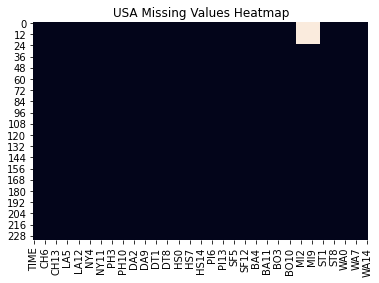

In [48]:
# heatmap of empty value
ax = plt.axes()
sns.heatmap(usa_df.isnull(), cbar=False ,ax = ax)
ax.set_title('USA Missing Values Heatmap')
plt.show()

<i>From the missing value heatmap above, we see the first 24 months of MI (Miami) is empty.<br> <br>In order to keep taking all the cities into acount ,<br> <b>I removed the first 24 months of data, so all cities will have values</b> </i>

In [49]:
# fRemove the empty rows (the first 24 months)
usa_df.dropna(axis=0, inplace=True)
usa_df.reset_index(drop=True, inplace = True)
usa_df

TIME    CH0    CH1    CH2    CH3    CH4    CH5    CH6    CH7    CH8  \
0   1978-01-01   61.1   73.1   68.1   77.8   50.8   55.1   69.8   93.1   98.8   
1   1978-02-01   61.7   74.2   68.8   79.5   51.8   55.5   70.0   92.9   95.8   
2   1978-03-01   62.4   74.8   69.8   80.2   52.9   56.7   71.1   94.8   98.2   
3   1978-04-01   62.7   76.1   70.5   79.6   52.8   57.1   71.9   92.8  103.4   
4   1978-05-01   63.3   77.0   70.6   80.3   53.3   57.5   72.0   94.0  105.1   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
204 1995-01-01  151.8  155.9  138.2  159.2  170.9  116.8  118.2  127.6  115.1   
205 1995-02-01  152.3  157.5  138.0  162.1  171.8  114.5  117.7  121.9  126.8   
206 1995-03-01  152.6  156.7  139.0  162.8  172.7  112.3  117.1  126.7  126.3   
207 1995-04-01  153.1  157.3  138.9  163.7  173.6  111.6  118.1  124.8  125.3   
208 1995-05-01  153.0  155.8  139.4  162.8  174.2  110.8  118.3  126.9  118.4   

     ...      WA5      WA6      WA7      WA8      WA9     WA10     WA11  \
0    ...   58.700   71.600   80.400   83.800   70.200   61.800   53.300   
1    ... -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
2    ...   60.800   73.700   83.700   83.900   71.400   62.100   53.400   
3    ... -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
4    ...   60.700   74.900   83.800   85.400   71.700   63.200   53.400   
..   ...      ...      ...      ...      ...      ...      ...      ...   
204  ...  121.700  135.200  135.400  122.600  139.000  141.700  139.000   
205  ... -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
206  ...  122.300  137.300  157.500  143.500  142.000  140.400  140.600   
207  ... -999.999 -999.999 -999.999 -999.999 -999.999 -999.999 -999.999   
208  ...  122.900  134.600  149.700  131.800  135.600  141.900  136.400   

        WA12     WA13     WA14  
0     61.000   69.800   74.800  
1   -999.999 -999.999 -999.999  
2     61.200   70.900   74.900  
3   -999.999 -999.999 -999.999  
4     60.900   71.100   74.200  
..       ...      ...      ...  
204  208.500  156.900  164.300  
205 -999.999 -999.999 -999.999  
206  209.000  156.900  163.200  
207 -999.999 -999.999 -999.999  
208  209.300  158.300  161.200  

[209 rows x 211 columns]

### Finding Outlier Values  <a class="anchor" id="usa_of"></a>

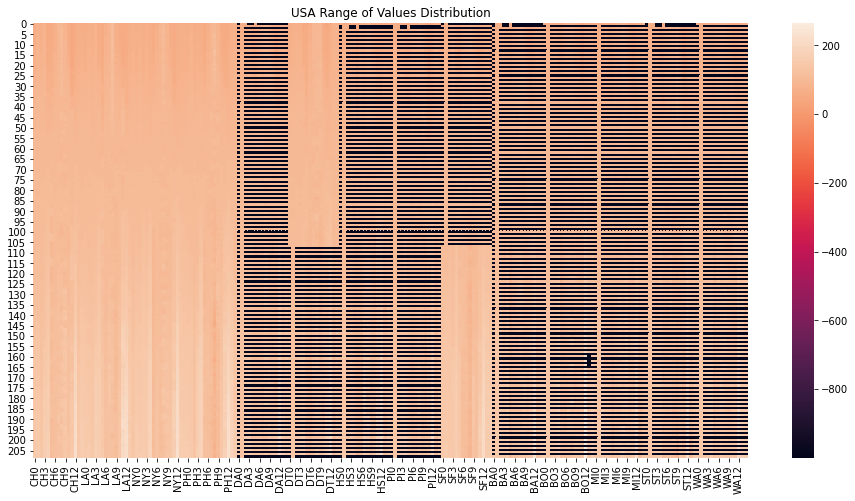

In [50]:
# heatmap of value distribution
fig, ax = plt.subplots(figsize=(16,8))
ax = plt.axes()
sns.heatmap(usa_df[usa_df.columns[1:]] ,ax = ax)
ax.set_title('USA Range of Values Distribution')
plt.show()

It is observable that there are patterns in outlier values like -999 in the data (represented as black) <br>
Some first cities listed on the data, CH, LA, NY, PH has no outliers.

Since, I do not have economy background. I cannot assume the optimum way to fill the outlier value (backfill, mean, or another range)<br>
<b>I will work only for the city with complete data</b>
 

### Pattern of Outlier Values, (sampling Washington and St. Louis) <a class="anchor" id="usa_op"></a>

In [8]:
sample_df = usa_df[usa_df.columns[-30:]].head(36)

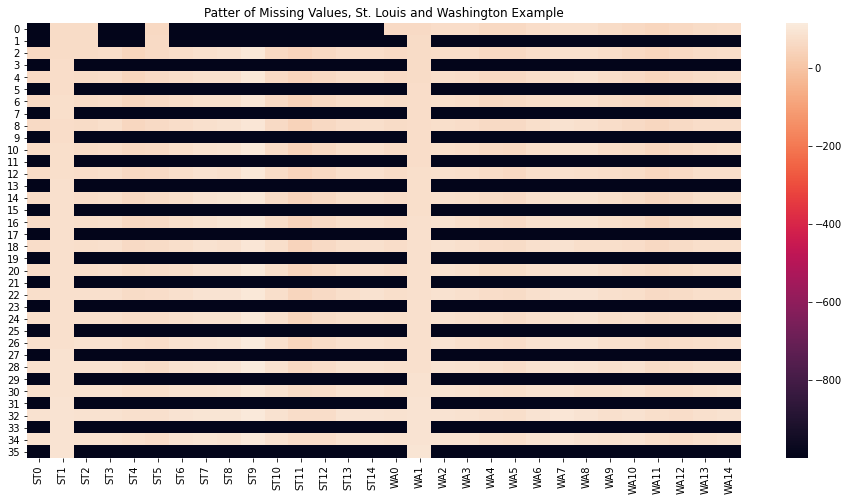

In [51]:
# heatmap of value distribution
fig, ax = plt.subplots(figsize=(16,8))
ax = plt.axes()
sns.heatmap(sample_df ,ax = ax)
ax.set_title('Patter of Missing Values, St. Louis and Washington Example')
plt.show()

From sampling first 36 months data of Washington and St.Louis, there are some conclusion about quality of data:<br><br>
    - The black color represents not meaningful data, occurs every 2 months <br>
    - If we see from complete heatmap from previous figure, we can conclude the America data has average sampling of 2 months

### Plotting (Analysis is separate on report PDF)<a class="anchor" id="usa_nc"></a>

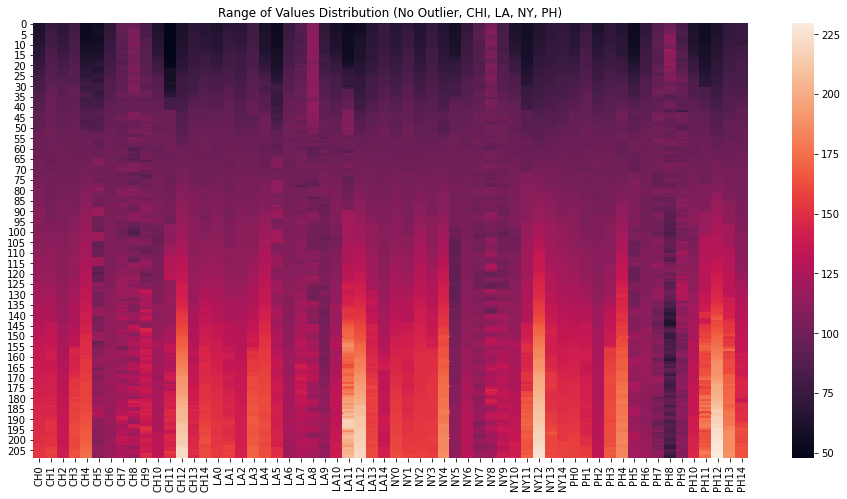

In [10]:
#Take the first 4 city
normal_usa_df = usa_df[usa_df.columns[:61]]

# heatmap of value distribution
fig, ax = plt.subplots(figsize=(16,8))
ax = plt.axes()
sns.heatmap(normal_usa_df[normal_usa_df.columns[1:]] ,ax = ax)
ax.set_title('Range of Values Distribution (No Outlier, CHI, LA, NY, PH)')
plt.show()

In [11]:
# Dictionary of columns code given from Homework PDF
goods_descriptions = {"0": "City CPI",
"1": "Food at home",
"2": "Food away from home",
"3": "Alcoholic beverages",
"4": "Shelter",
"5": "Fuel and other utilities",
"6": "Household furnishings & operations",
"7": "Men’s and boy’s apparel",
"8": "Women’s and girl’s apparel",
"9": "Footwear",
"10": "Private transportation",
 "11": "Public transportation",
"12": "Medical care",
"13": "Personal care",
"14": "Entertainment"}

city_names = {"CH": "Chicago",
"LA": "Los Angeles",
"NY": "New York City",
"PH": "Philadelphia",
"DA": "Dallas",
"DT": "Detroit",
"HS": "Houston",
"PI": "Pittsburgh",
"SF": "San Francisco",
"BA": "Baltimore",
"BO": "Boston",
"MI": "Miami",
"ST": "St. Louis",
"WA": "Washington, DC",
"Q": "Quebec",
"M": "Montreal",
"O": "Ottawa",
"T": "Toronto",
"W": "Winnipeg",
"R": "Regina",
"E": "Edmonton",
"C": "Calgary",
"V": "Vancouver"}

#function to give the definition from goods descriptipn
def columns_descriptor(column_name, city_code_length = 2):
    if(column_name=='TIME'):
        return column_name
    else:
        number = column_name[city_code_length:]
        return goods_descriptions[number]
    
#function to give the definition from goods descriptipn
def columns_descriptor(column_name, city_code_length = 2):
    if(column_name=='TIME'):
        return column_name,column_name
    else:
        city_code = ''.join([i for i in column_name if not i.isdigit()])
        number_code = ''.join([i for i in column_name if i.isdigit()])
        return goods_descriptions[number_code], city_names[city_code]


### Plotting per city <a class="anchor" id="usa_nc_pc"></a>

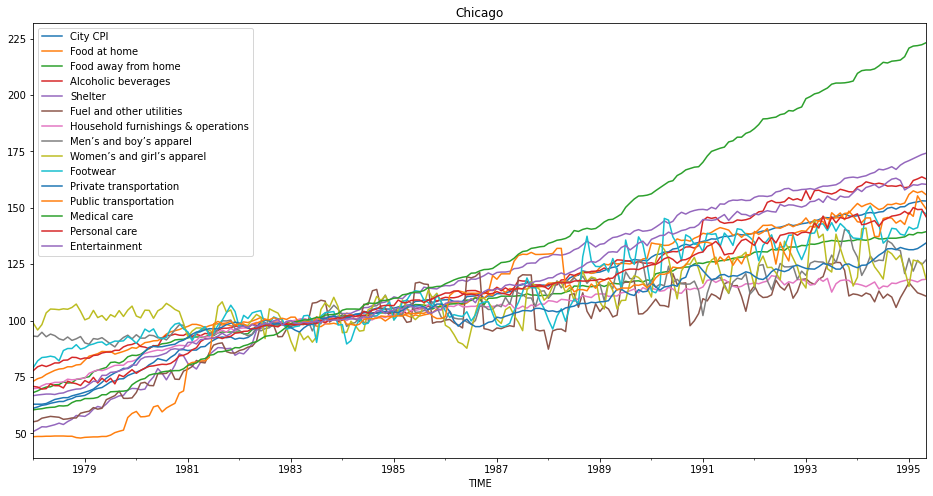

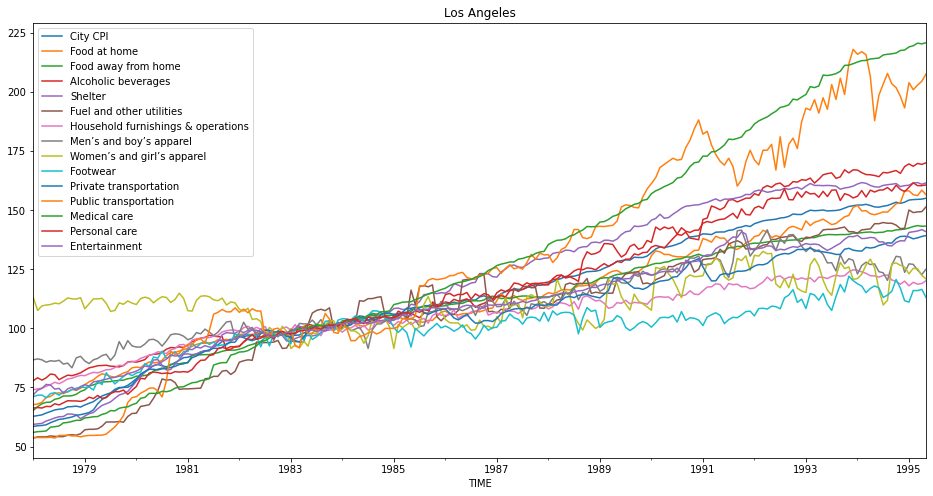

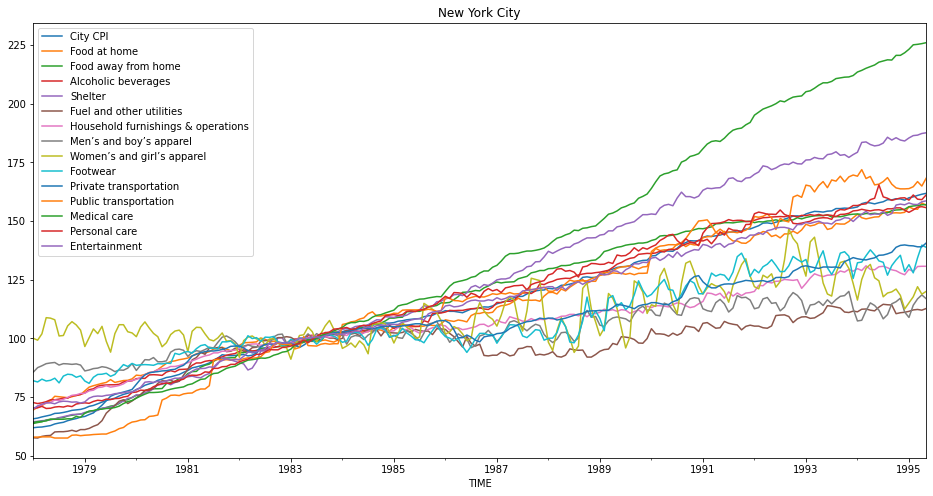

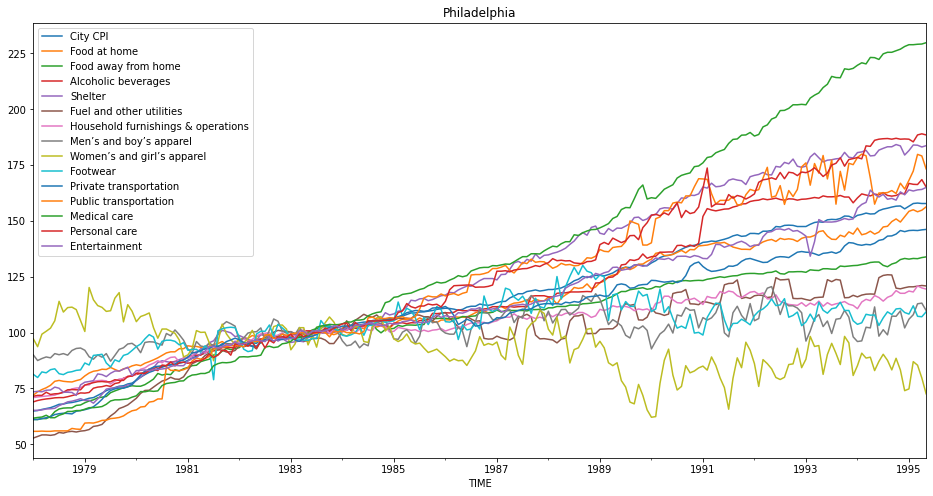

In [14]:
############################################ Plot per city #################################################

city_codes = ['CH','LA','NY','PH']
index = 0
for city_code in city_codes:
    city_cols = [col for col in normal_usa_df.columns if city_code[0] in col]
    goods_cols = [columns_descriptor(col)[0] for col in city_cols if city_code[0] in col]
    time_city_cols = ['TIME']+city_cols
    df_city = normal_usa_df[time_city_cols]
    
    # rename goods_code into the full description
    for i in range(0,df_city.shape[1]):
        current_col = df_city.columns[i]
        df_city = df_city.rename(columns = {current_col:columns_descriptor(current_col)[0]})
    
    df_city.set_index('TIME').plot(title = city_names[city_code], figsize = (16,8))
    plt.legend(loc=2, prop={'size': 10})
  
    

### Plotting Per Goods Sector <a class="anchor" id="usa_nc_ps"></a>

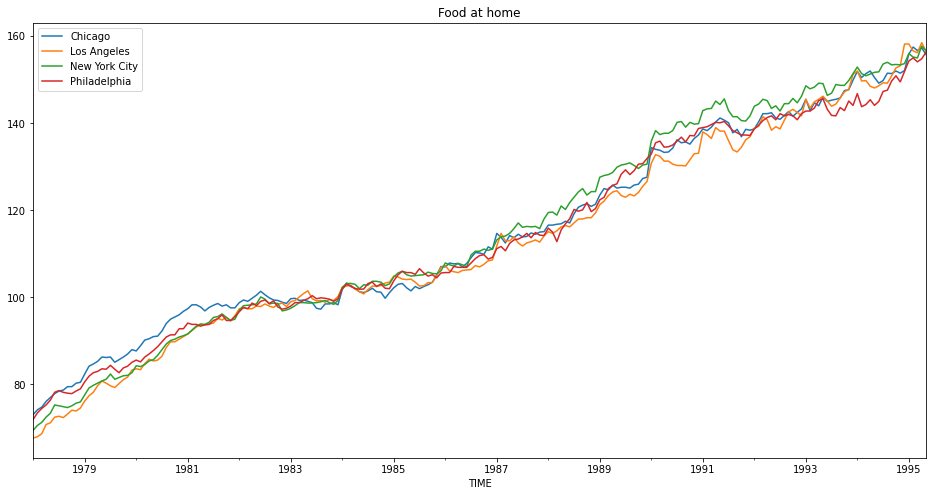

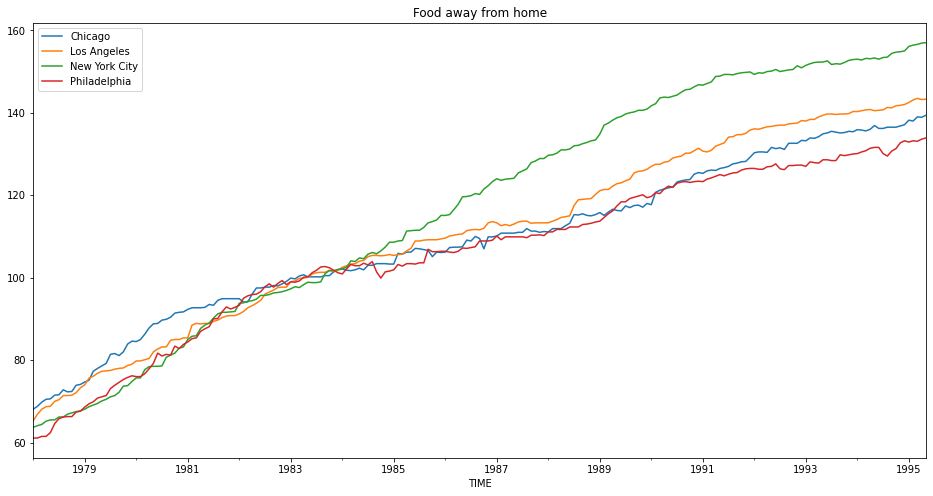

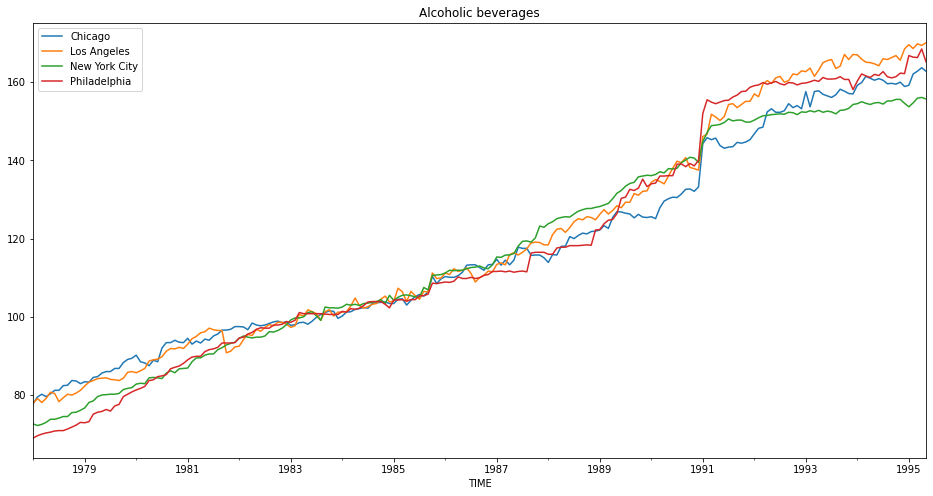

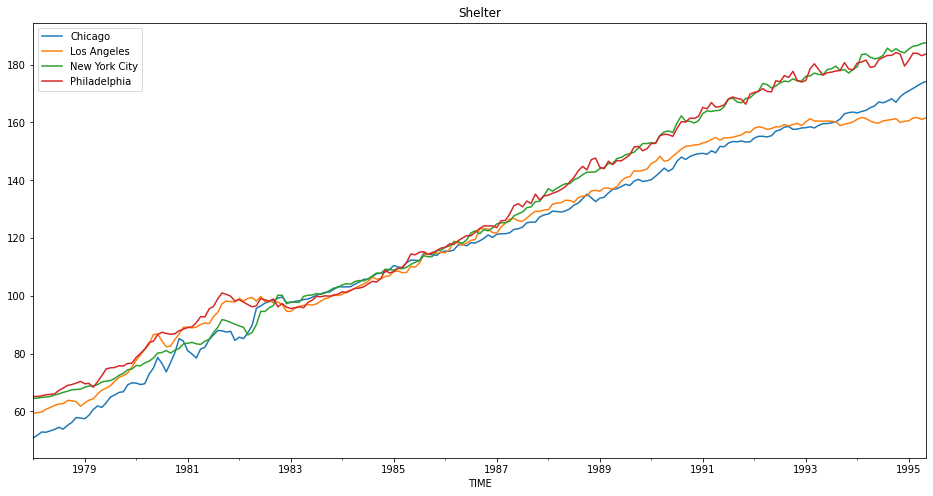

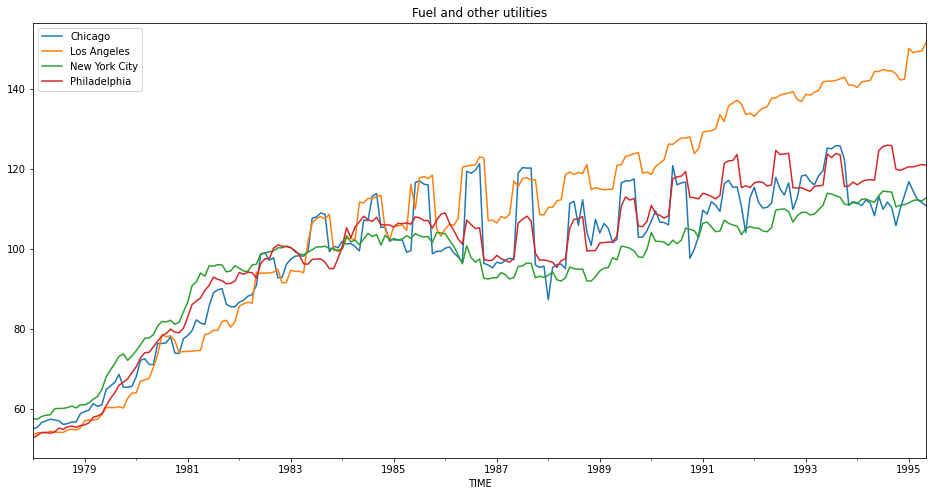

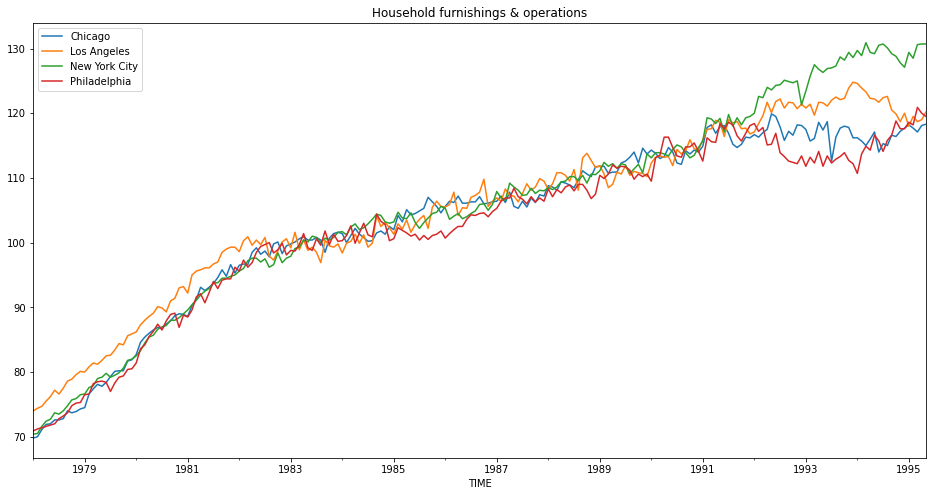

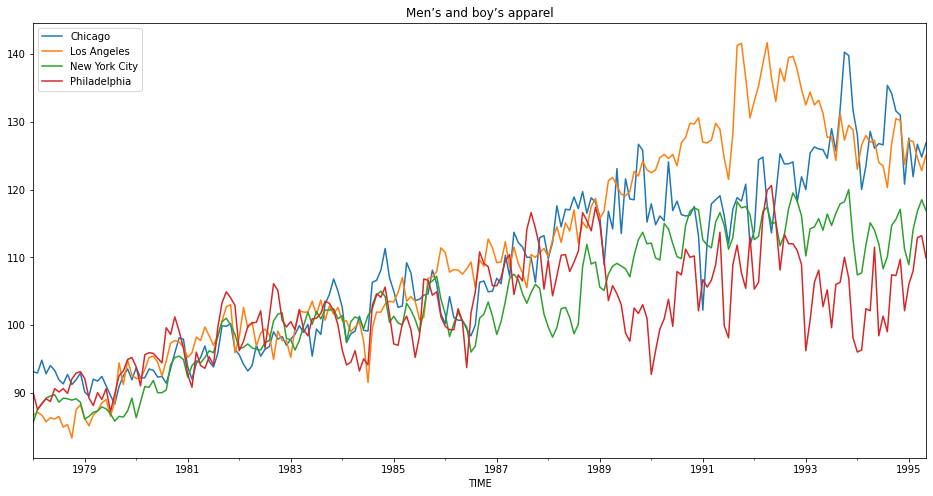

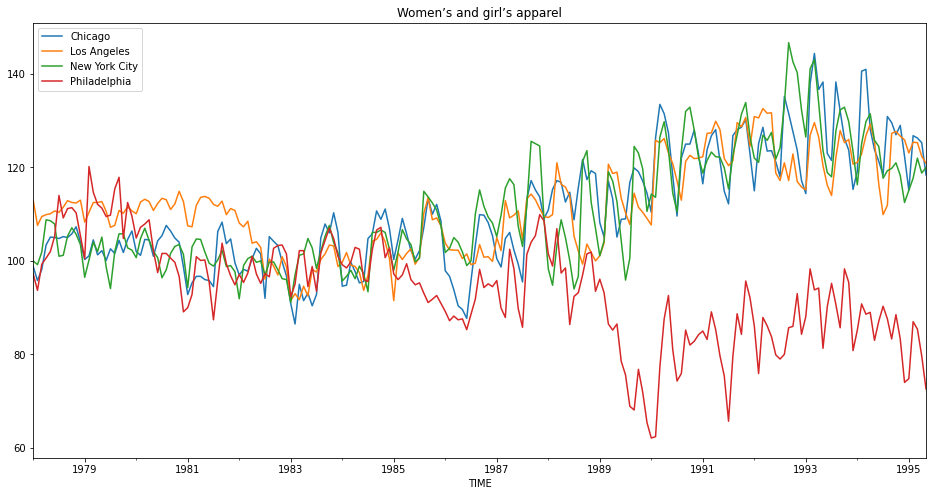

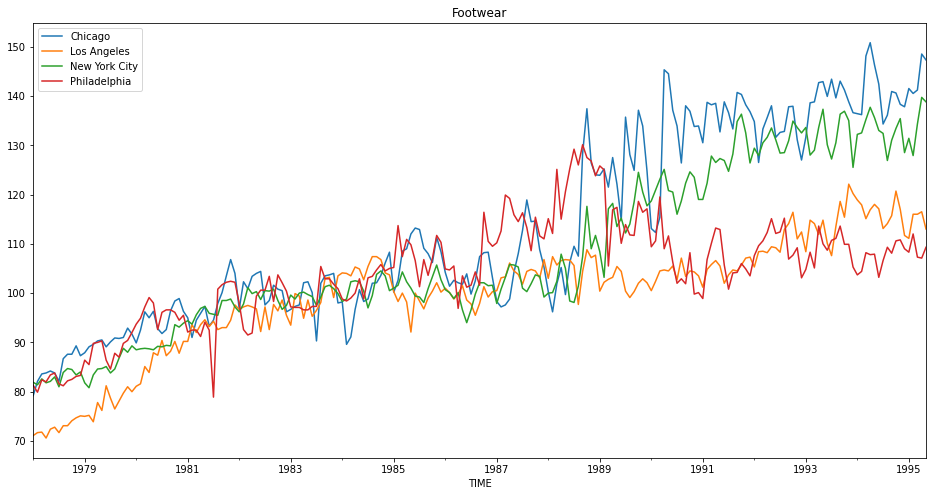

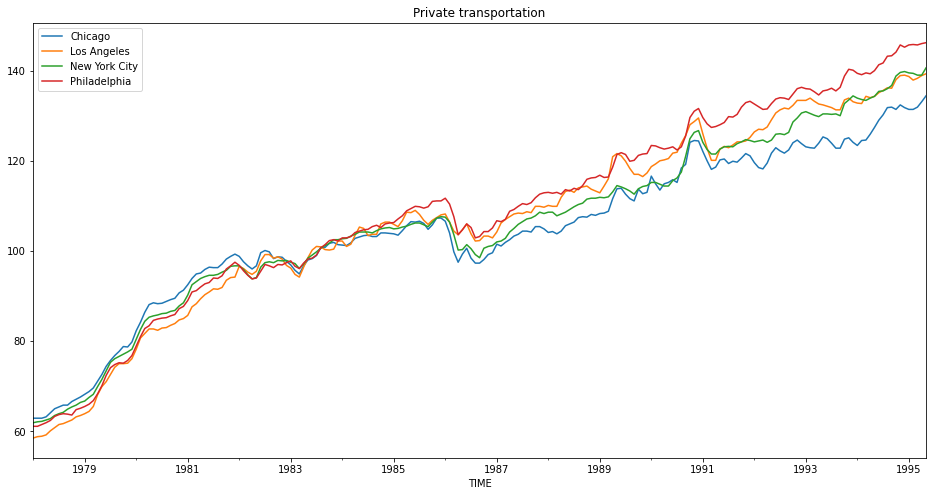

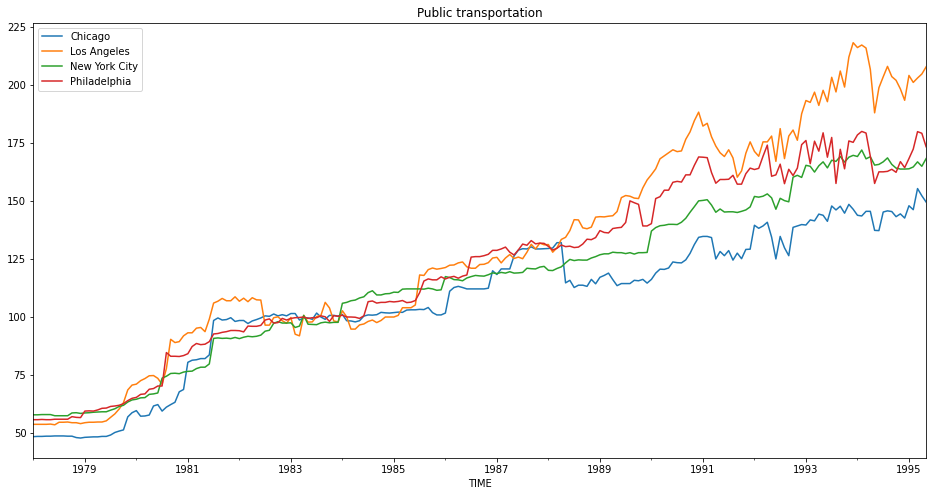

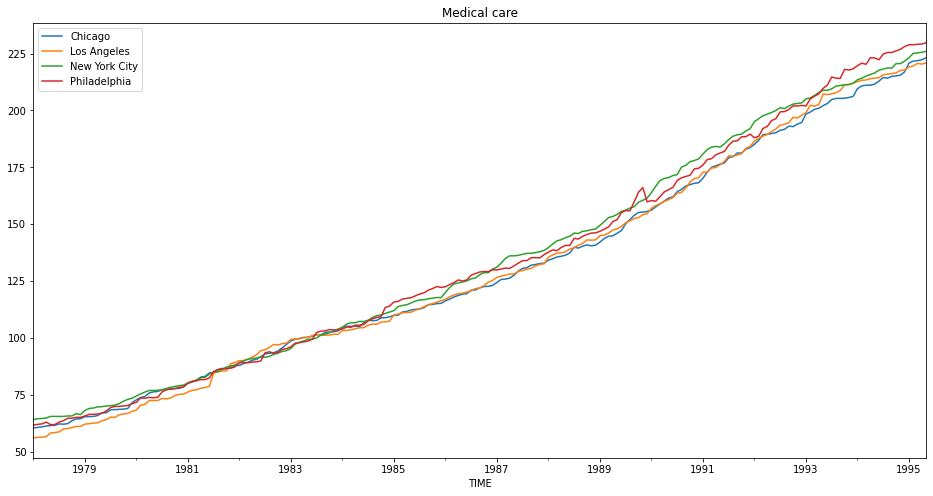

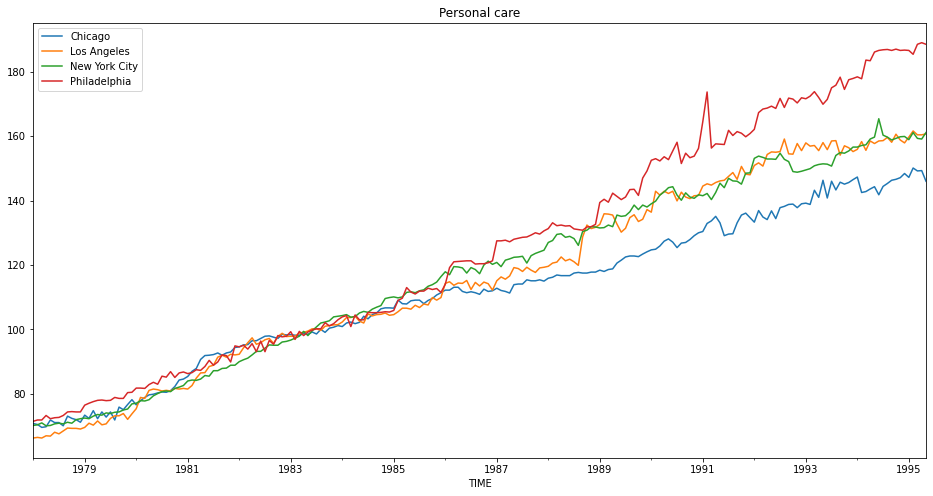

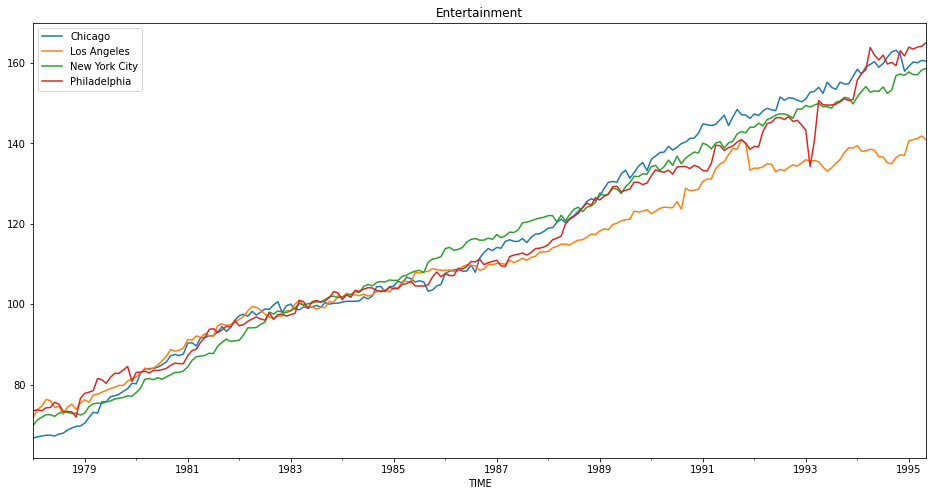

In [13]:
############################################ Plot per sector #################################################
good_codes = [str(i) for i in range(1,15)]

for good_sector in good_codes:
    
    good_cols = []
    for col in normal_usa_df.columns:
        number_code = re.findall(r'\d+', col)
        if (number_code):
            if ((re.findall(r'\d+', col)[0])==good_sector):
                good_cols.append(col)
    good_cols = ['TIME'] + good_cols
    
    df_goods = normal_usa_df[good_cols]
    
    # rename goods_code into the full description
    for i in range(0,df_goods.shape[1]):
        current_col = df_goods.columns[i]
        df_goods = df_goods.rename(columns = {current_col:columns_descriptor(current_col)[1]})
    
    df_goods.set_index('TIME').plot(title = goods_descriptions[good_sector], figsize = (16,8))
    plt.legend(loc=2, prop={'size': 10})

### Correlation Map Between Goods <a class="anchor" id="usa_cg"></a>

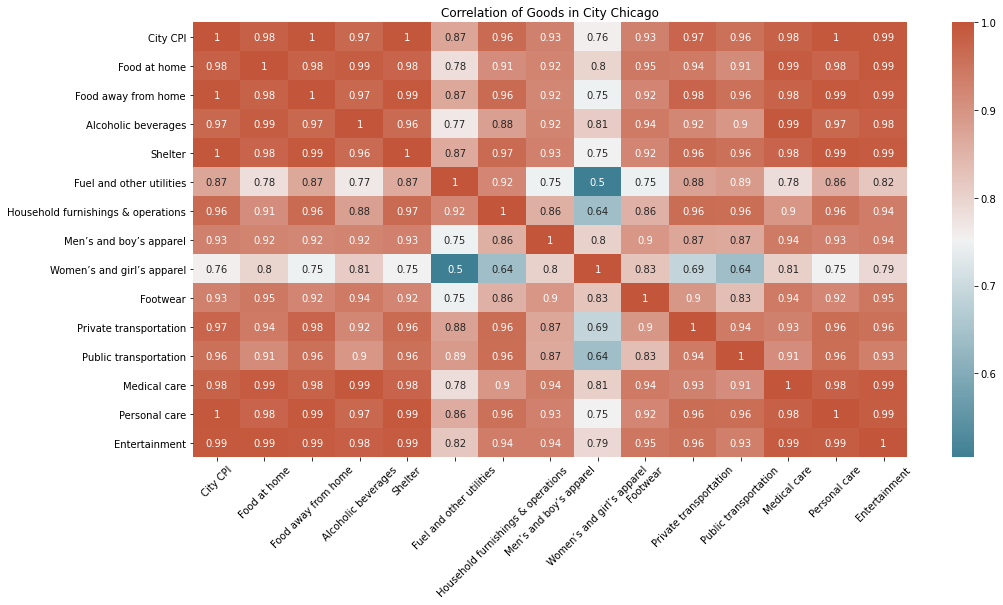

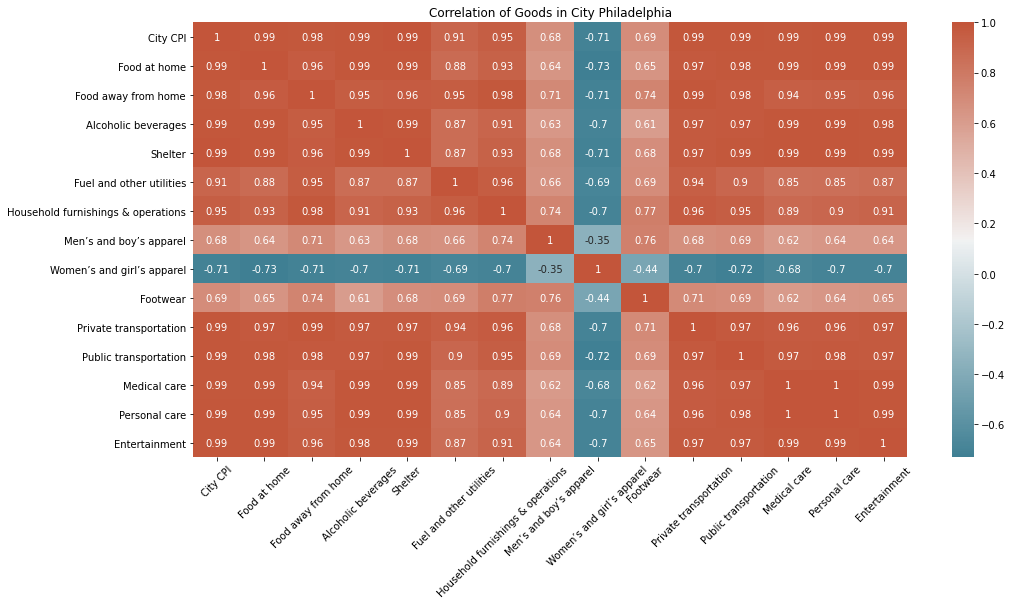

In [54]:
city_codes = ['CH','PH']
for city_code in city_codes:
    city_cols = [col for col in normal_usa_df.columns if city_code[0] in col]
    goods_cols = [columns_descriptor(col)[0] for col in city_cols if city_code[0] in col]
    time_city_cols = ['TIME']+city_cols
    df_city = normal_usa_df[time_city_cols]

    # rename goods_code into the full description
    for i in range(0,df_city.shape[1]):
        current_col = df_city.columns[i]
        df_city = df_city.rename(columns = {current_col:columns_descriptor(current_col)[0]})
        
    fig, ax = plt.subplots(figsize=(16,8))
    ax = plt.axes()
    corr = df_city.corr()# plot the heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    ax.set_title('Correlation of Goods in City '+ city_names[city_code])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Boxplot<a class="anchor" id="usa_bp"></a>

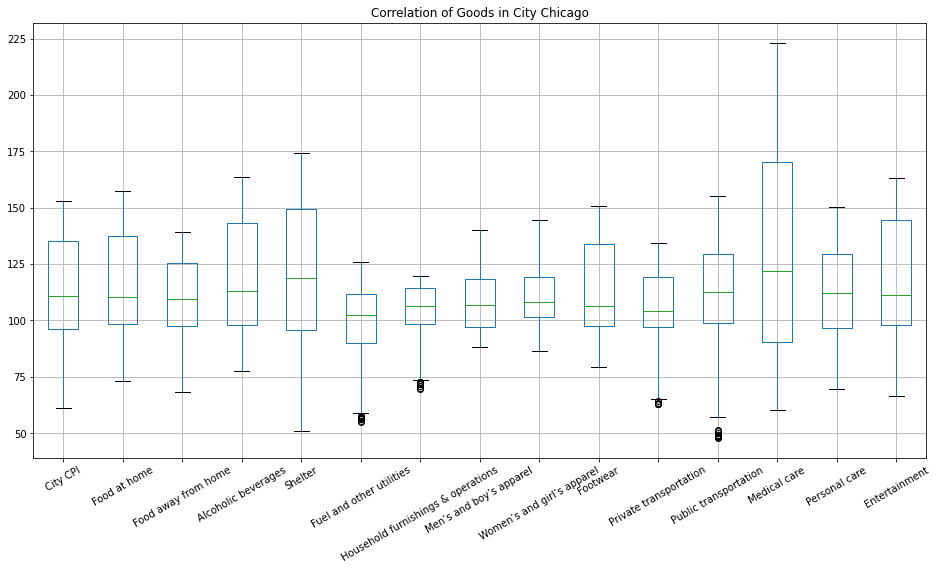

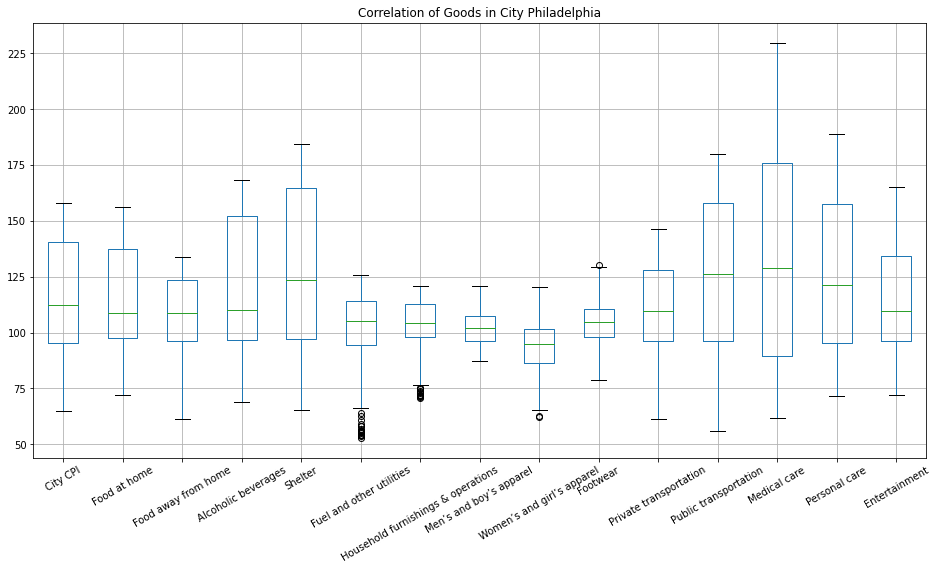

In [27]:
city_codes = ['CH','PH']
for city_code in city_codes:
    city_cols = [col for col in normal_usa_df.columns if city_code[0] in col]
    goods_cols = [columns_descriptor(col)[0] for col in city_cols if city_code[0] in col]
    time_city_cols = ['TIME']+city_cols
    df_city = normal_usa_df[time_city_cols]

    # rename goods_code into the full description
    for i in range(0,df_city.shape[1]):
        current_col = df_city.columns[i]
        df_city = df_city.rename(columns = {current_col:columns_descriptor(current_col)[0]})
        
    fig, ax = plt.subplots(figsize=(16,8))
    ax = plt.axes()
    corr = df_city.corr()# plot the heatmap
    df_city.boxplot()
    ax.set_title('Correlation of Goods in City '+ city_names[city_code])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


## CANADA DATA<a class="anchor" id="can"></a>

### Load Data and Time Formatting <a class="anchor" id="can_ld_tf"></a>

In [28]:
############## Load excel into pandas dataframe #################

can_df = pd.read_excel('data/CAN.xls')
# Removing Unknown Column , the last 11 columns is not named in the homework document
can_df = can_df[can_df.columns[:-11]]
can_df.head()

Unnamed: 0  Q0  M0  O0  T0  W0  R0  E0  C0  V0  ...  V13  Q14  M14  O14  \
0    1974:01 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1    1974:02 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
2    1974:03 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
3    1974:04 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
4    1974:05 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   

   T14  W14  R14  E14  C14  V14  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 136 columns]

In [29]:
############## Time Formating #################

# rename the first column to appropriate name
can_df=can_df.rename(columns = {can_df.columns[0]:'TIME'})
# convert the first columns into pandas datetime format
can_df['TIME'] = pd.to_datetime(can_df['TIME'], format='%Y:%m', errors='ignore')
# preview of %YYYY-%MM-%DD format
can_df.head()

TIME  Q0  M0  O0  T0  W0  R0  E0  C0  V0  ...  V13  Q14  M14  O14  \
0 1974-01-01 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
1 1974-02-01 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
2 1974-03-01 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
3 1974-04-01 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
4 1974-05-01 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   

   T14  W14  R14  E14  C14  V14  
0  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 136 columns]

### Dealing with Missing Values <a class="anchor" id="can_mf"></a>

In [30]:
# find the column with missing value
can_df.columns[can_df.isnull().any()]

Index(['Q0', 'M0', 'O0', 'T0', 'W0', 'R0', 'E0', 'C0', 'V0', 'Q1',
       ...
       'V13', 'Q14', 'M14', 'O14', 'T14', 'W14', 'R14', 'E14', 'C14', 'V14'],
      dtype='object', length=135)

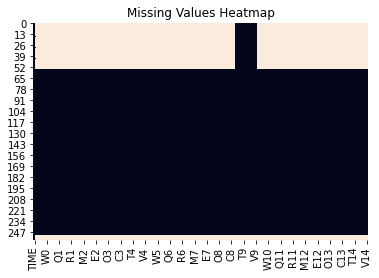

In [31]:
# heatmap of empty value
ax = plt.axes()
sns.heatmap(can_df.isnull(), cbar=False ,ax = ax)
ax.set_title('Missing Values Heatmap')
plt.show()

<i>From the missing value heatmap above, we see the first 60 months for Almost of the cities are empty.<br> <br>In order to keep taking all the cities into acount ,<br> <b>I removed the first 60 months of data, so all cities will have values</b> </i>

In [32]:
# Remove the empty rows (the first 24 months)
can_df.dropna(axis=0, inplace=True)
can_df.reset_index(drop=True, inplace = True)
can_df

TIME     Q0     M0     O0     T0     W0     R0     E0     C0     V0  \
0   1978-09-01   55.6   55.7   56.7   55.4   57.9   59.1   58.3   58.5   58.3   
1   1978-10-01   55.9   56.0   57.4   56.2   59.0   59.4   59.1   58.8   58.6   
2   1978-11-01   56.5   56.4   57.8   56.7   59.2   59.9   59.6   59.3   59.0   
3   1978-12-01   56.7   56.7   58.1   56.7   59.4   60.1   59.8   59.3   59.2   
4   1979-01-01   57.1   57.1   58.5   57.3   59.6   60.8   60.0   59.8   59.6   
..         ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
191 1994-08-01  127.9  129.0  131.1  132.1  132.2  134.2  130.3  130.2  135.0   
192 1994-09-01  127.8  128.9  131.2  132.1  132.7  134.7  130.6  130.9  135.3   
193 1994-10-01  127.8  128.7  131.4  131.8  132.7  134.1  130.0  130.7  135.3   
194 1994-11-01  128.7  129.5  132.2  132.6  133.3  134.5  130.1  131.1  135.7   
195 1994-12-01  128.7  129.5  132.9  133.1  133.7  134.9  130.9  131.4  135.8   

     ...    V13        Q14        M14        O14        T14        W14  \
0    ...   62.7   62.87885   63.61030   61.86390   59.72153   59.46545   
1    ...   63.0   64.16390   63.69597   62.80627   60.57823   60.75050   
2    ...   63.8   64.50658   64.03865   62.97761   60.92091   60.92184   
3    ...   63.9   64.63524   64.16731   63.43493   60.90689   61.17916   
4    ...   64.3   65.28009   64.33865   63.52060   61.02122   61.26483   
..   ...    ...        ...        ...        ...        ...        ...   
191  ...  132.4  128.36879  130.11023  135.08281  136.05198  133.10241   
192  ...  131.8  128.48312  130.54013  135.29683  136.28095  133.68839   
193  ...  132.9  128.84075  130.96910  135.62549  136.56662  134.13107   
194  ...  132.5  129.44044  131.22611  135.53982  136.85229  134.38808   
195  ...  130.3  129.68281  130.71085  136.34137  136.82394  135.03107   

           R14        E14        C14        V14  
0     62.10875   61.62432   62.46576   59.05205  
1     62.28009   62.05267   62.55143   59.90875  
2     62.87978   62.73803   62.80844   60.25143  
3     62.95143   63.10968   62.83741   60.43741  
4     64.09504   63.10968   62.95174   60.60875  
..         ...        ...        ...        ...  
191  129.50992  132.98498  131.70899  136.57816  
192  129.65260  132.88498  132.40930  136.42177  
193  129.93827  133.44199  132.98064  136.30775  
194  130.10961  133.27065  132.98064  136.22208  
195  130.45384  133.49993  133.30899  136.37971  

[196 rows x 136 columns]

### Finding Outlier Values  <a class="anchor" id="can_of"></a>

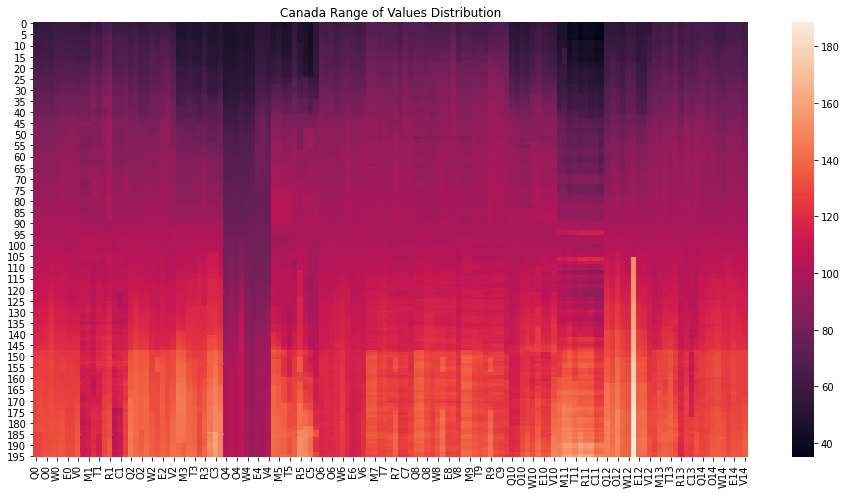

In [52]:
# heatmap of value distribution
fig, ax = plt.subplots(figsize=(16,8))
ax = plt.axes()
sns.heatmap(can_df[can_df.columns[1:]] ,ax = ax)
ax.set_title('Canada Range of Values Distribution')
plt.show()

<i>It is observable that the Canada data has normal range of data from -40 to 180 for all cities </i>

### Plotting (Analysis is separate on report PDF) <a class="anchor" id="can_nc"></a>

In [34]:
# Dictionary of columns code given from Homework PDF
goods_descriptions = {"0": "City CPI",
"1": "Food at home",
"2": "Food away from home",
"3": "Alcoholic beverages",
"4": "Shelter",
"5": "Fuel and other utilities",
"6": "Household furnishings & operations",
"7": "Men’s and boy’s apparel",
"8": "Women’s and girl’s apparel",
"9": "Footwear",
"10": "Private transportation",
 "11": "Public transportation",
"12": "Medical care",
"13": "Personal care",
"14": "Entertainment"}

city_names = {"CH": "Chicago",
"LA": "Los Angeles",
"NY": "New York City",
"PH": "Philadelphia",
"DA": "Dallas",
"DT": "Detroit",
"HS": "Houston",
"PI": "Pittsburgh",
"SF": "San Francisco",
"BA": "Baltimore",
"BO": "Boston",
"MI": "Miami",
"ST": "St. Louis",
"WA": "Washington, DC",
"Q": "Quebec",
"M": "Montreal",
"O": "Ottawa",
"T": "Toronto",
"W": "Winnipeg",
"R": "Regina",
"E": "Edmonton",
"C": "Calgary",
"V": "Vancouver"}

#function to give the definition from goods descriptipn
def columns_descriptor(column_name, city_code_length = 1):
    if(column_name=='TIME'):
        return column_name
    else:
        number = column_name[city_code_length:]
        return goods_descriptions[number]
    
#function to give the definition from goods descriptipn
def columns_descriptor(column_name, city_code_length = 2):
    if(column_name=='TIME'):
        return column_name,column_name
    else:
        city_code = ''.join([i for i in column_name if not i.isdigit()])
        number_code = ''.join([i for i in column_name if i.isdigit()])
        return goods_descriptions[number_code], city_names[city_code]


### Plotting Per City <a class="anchor" id="can_nc_pc"></a>

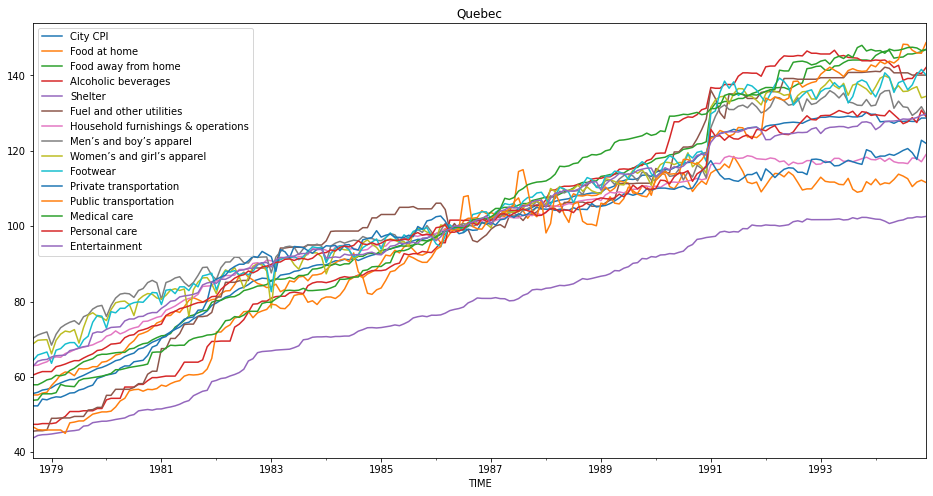

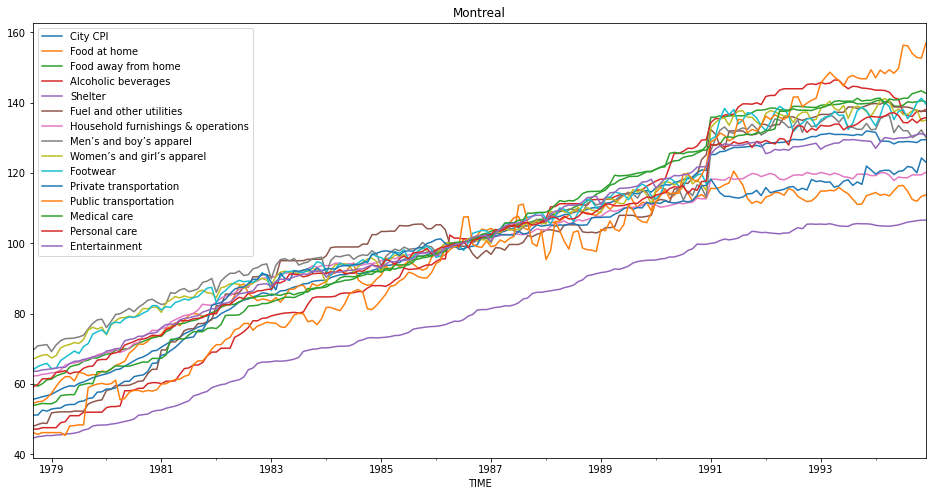

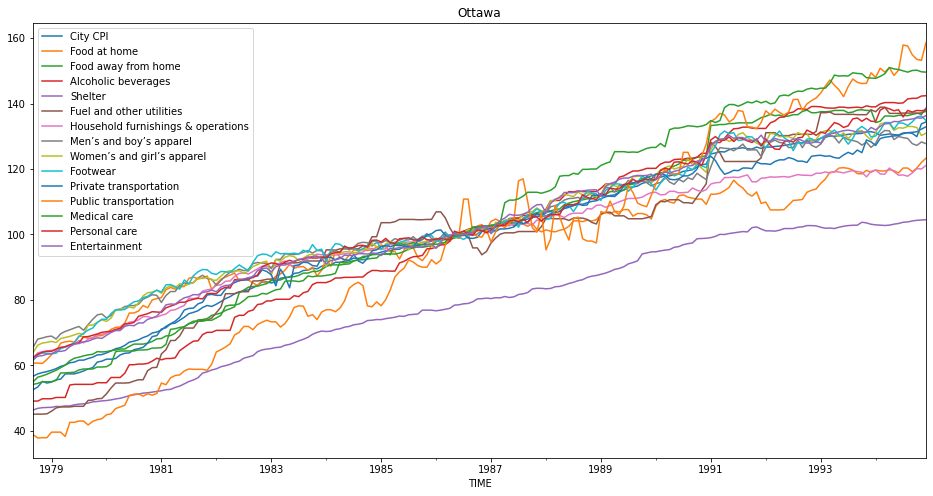

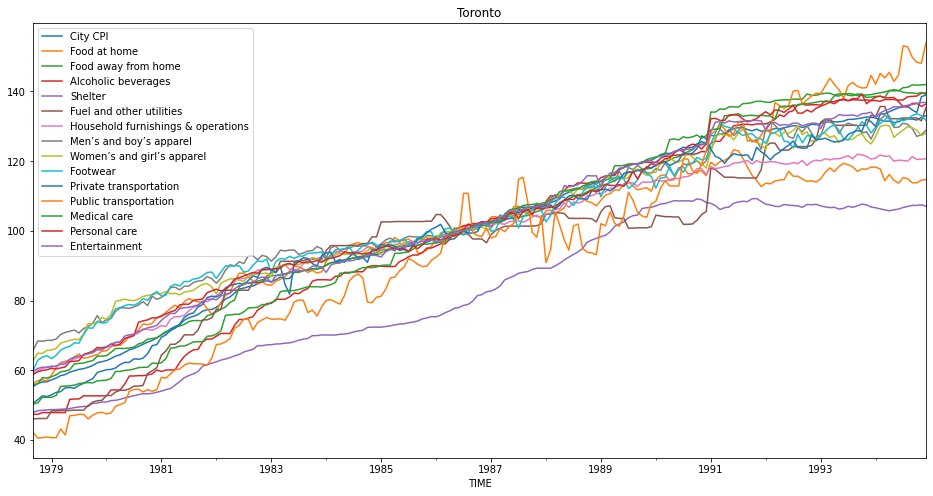

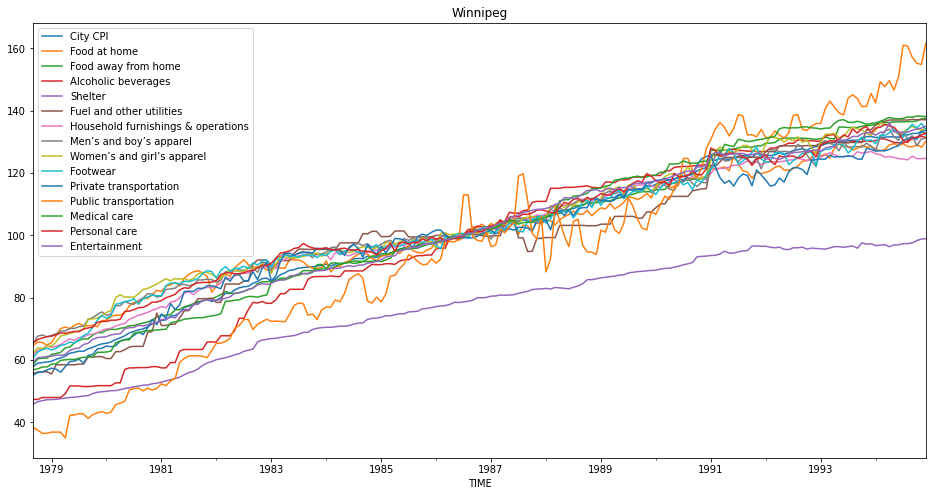

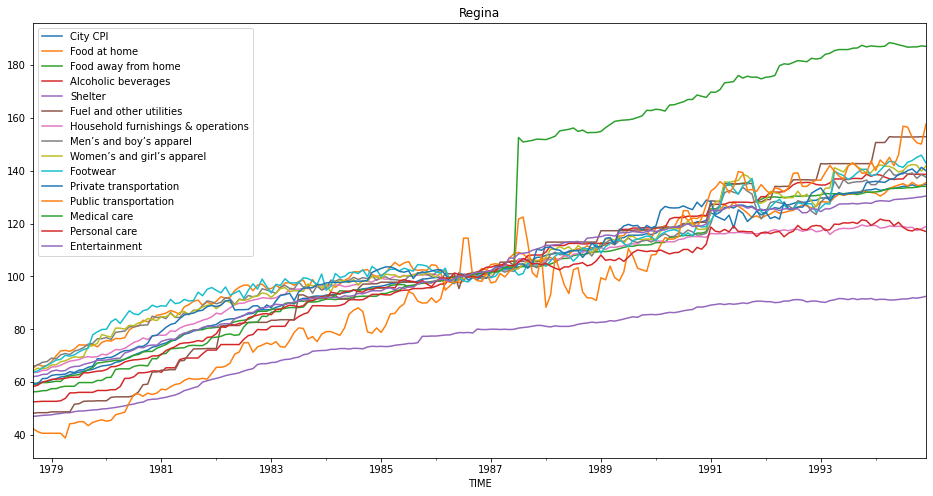

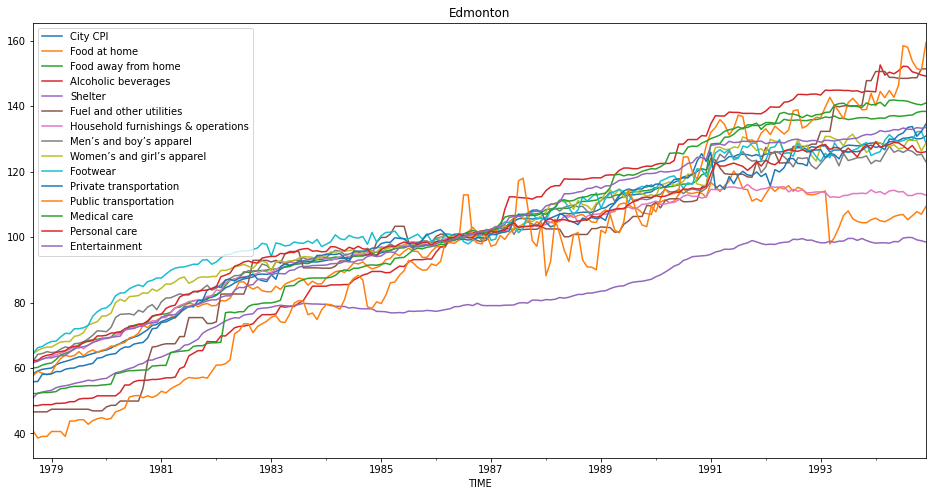

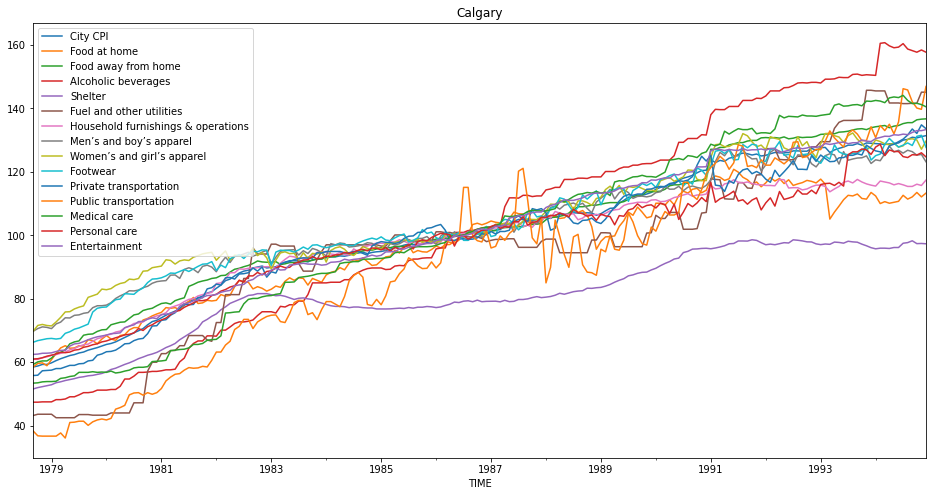

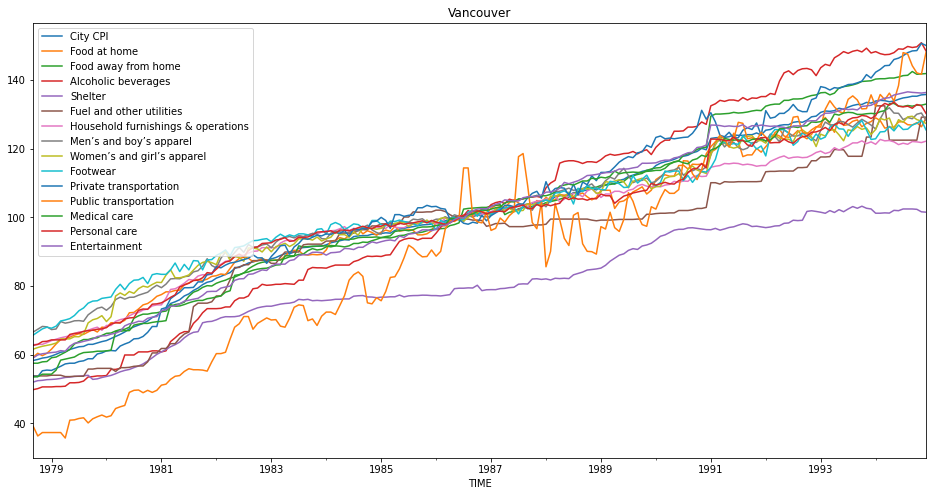

In [35]:
############################################ Plot per city #################################################

city_codes = ['Q','M','O','T', 'W', 'R', 'E', 'C', 'V']
index = 0
for city_code in city_codes:
    city_cols = [col for col in can_df.columns if city_code in col]
    goods_cols = [columns_descriptor(col)[0] for col in city_cols if city_code[0] in col]
    if 'TIME' not in city_cols: 
        time_city_cols = ['TIME']+city_cols
    else:
        time_city_cols = city_cols
    df_city = can_df[time_city_cols]
    
    # rename goods_code into the full description
    for i in range(0,df_city.shape[1]):
        current_col = df_city.columns[i]
        df_city = df_city.rename(columns = {current_col:columns_descriptor(current_col)[0]})
    
    df_city.set_index('TIME').plot(title = city_names[city_code], figsize = (16,8))
    plt.legend(loc=2, prop={'size': 10})
  
    

# Plotting Per Goods Sector <a class="anchor" id="can_nc_ps"></a>

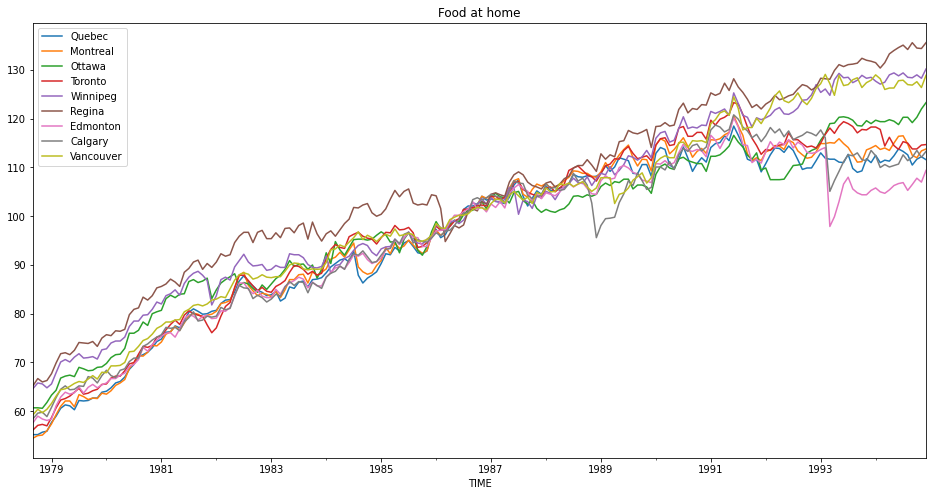

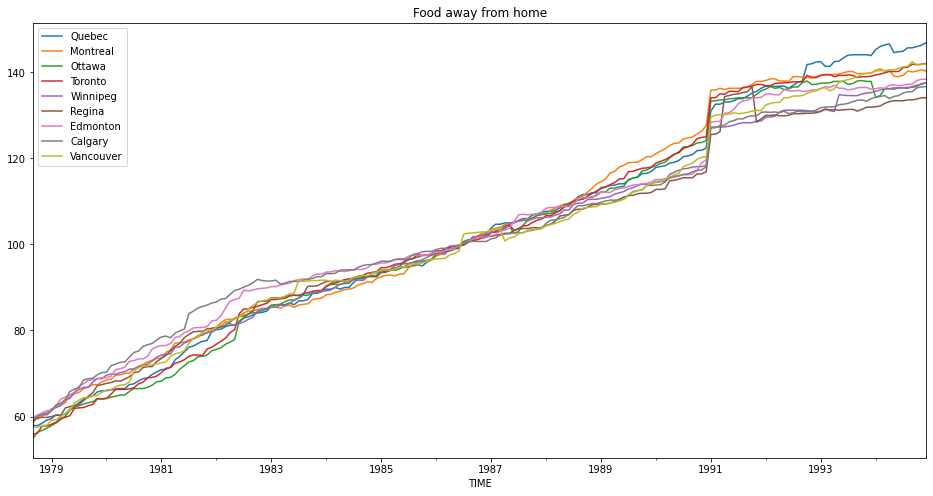

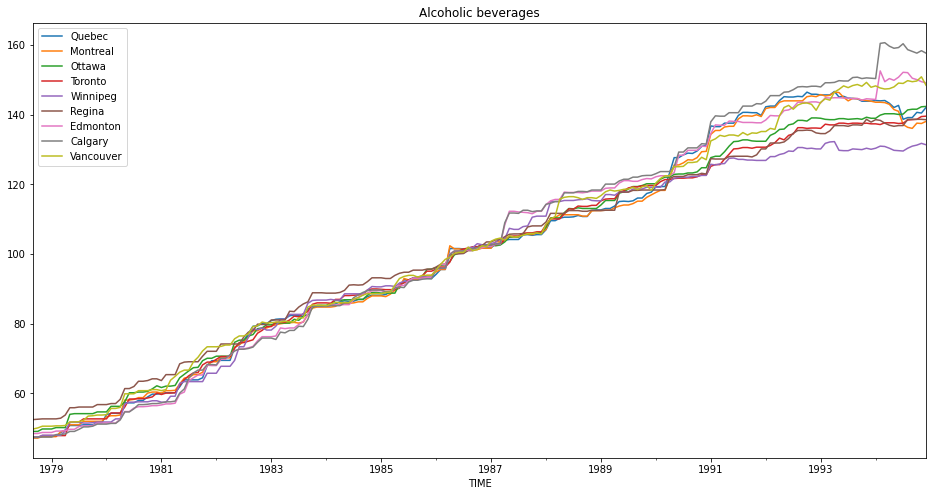

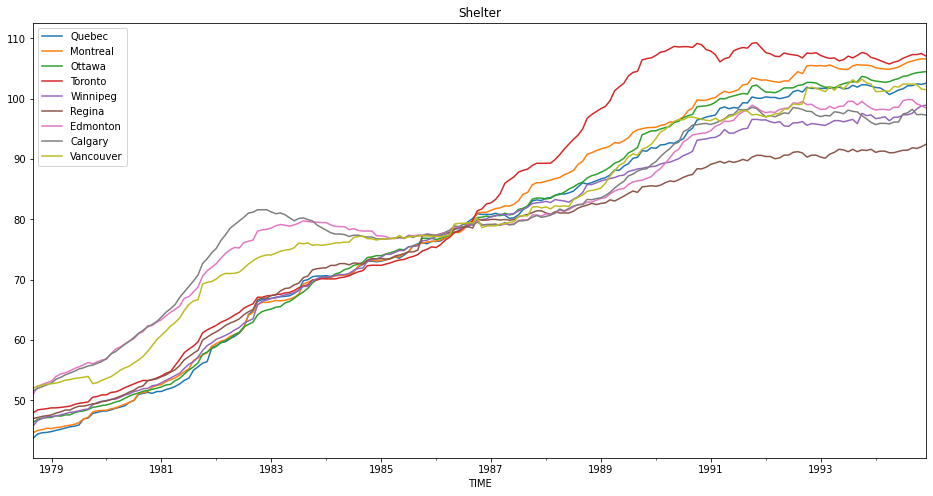

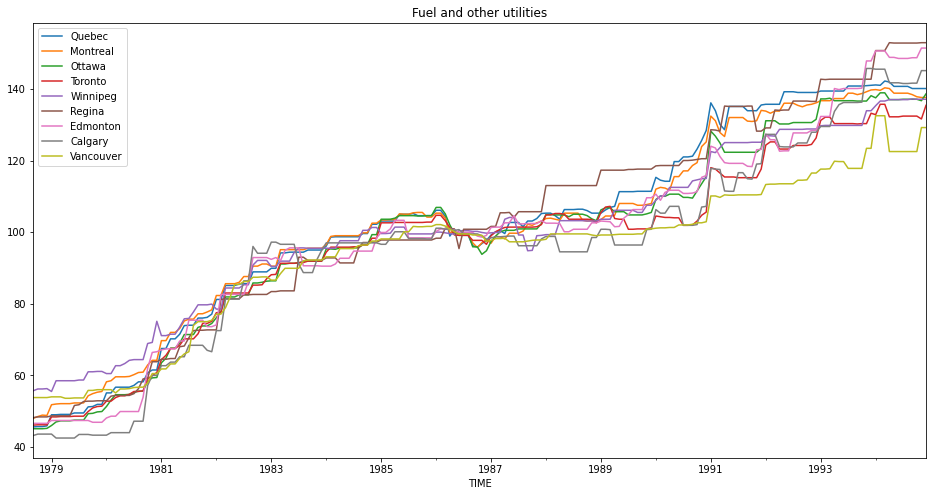

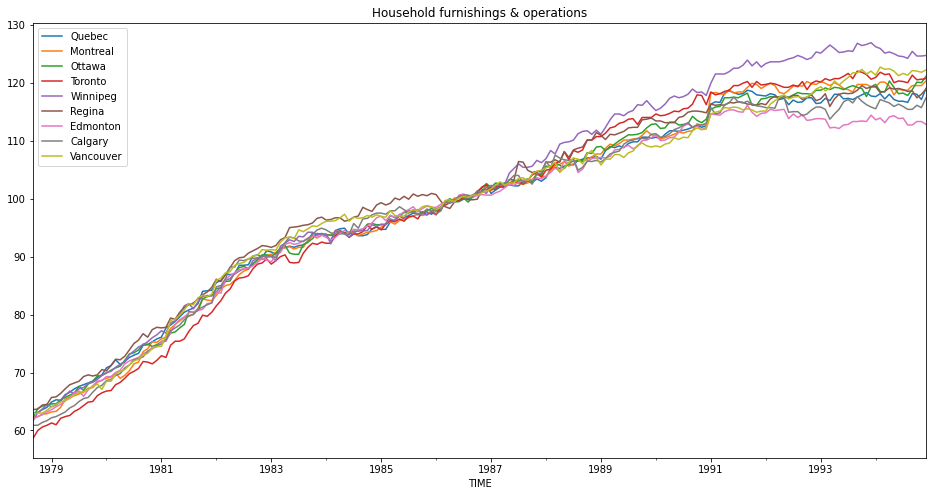

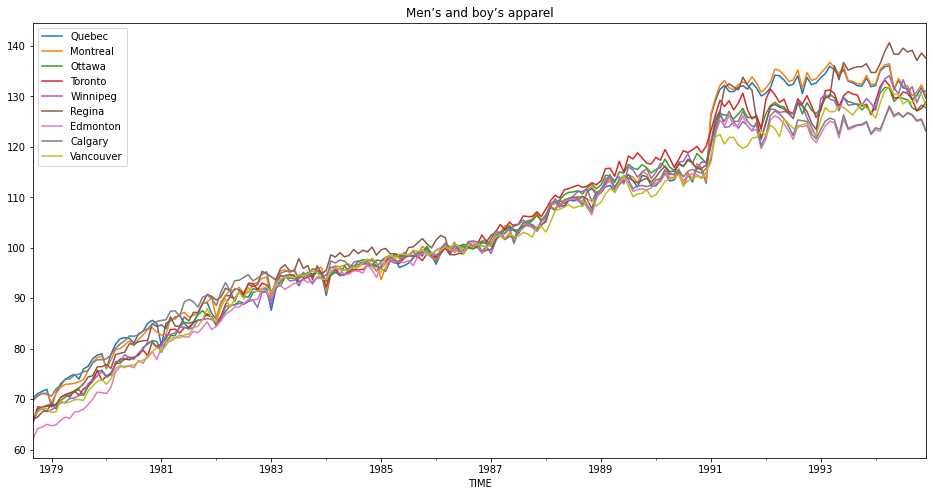

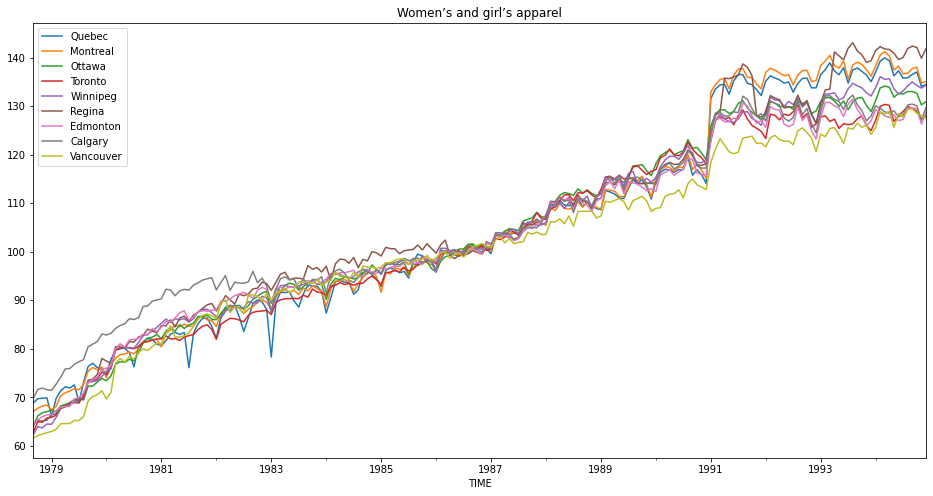

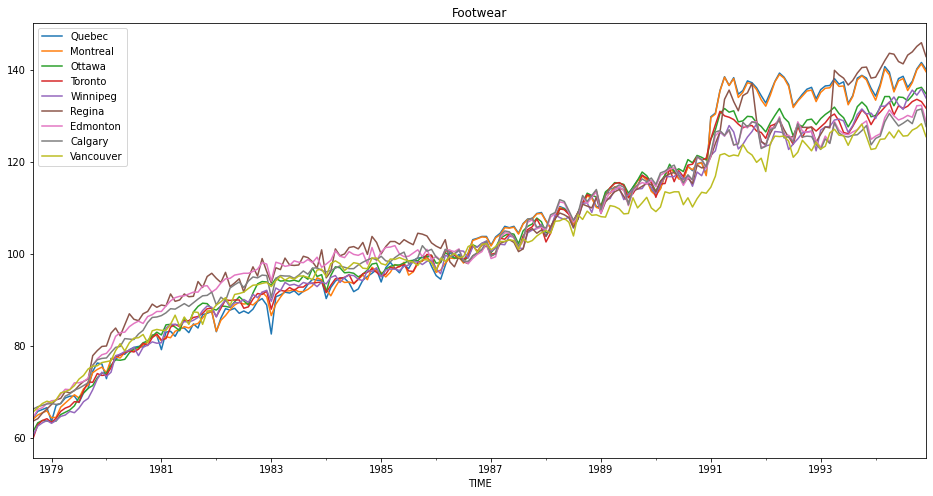

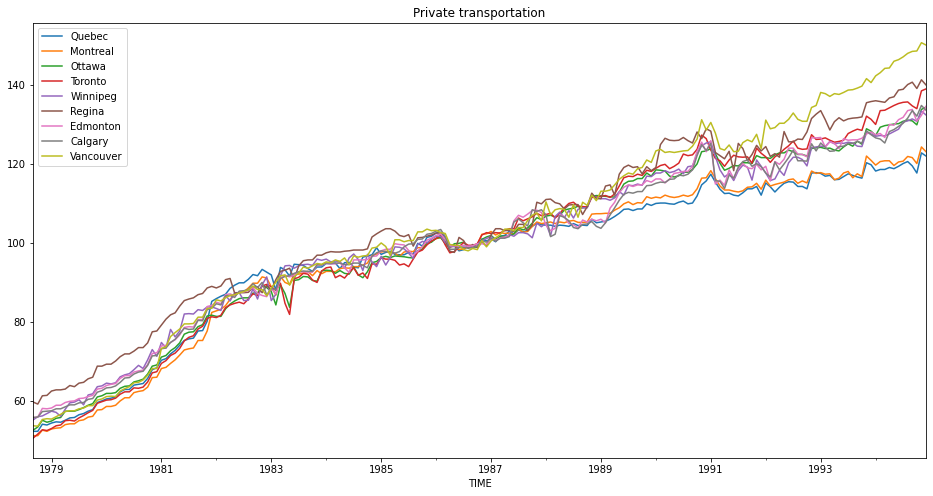

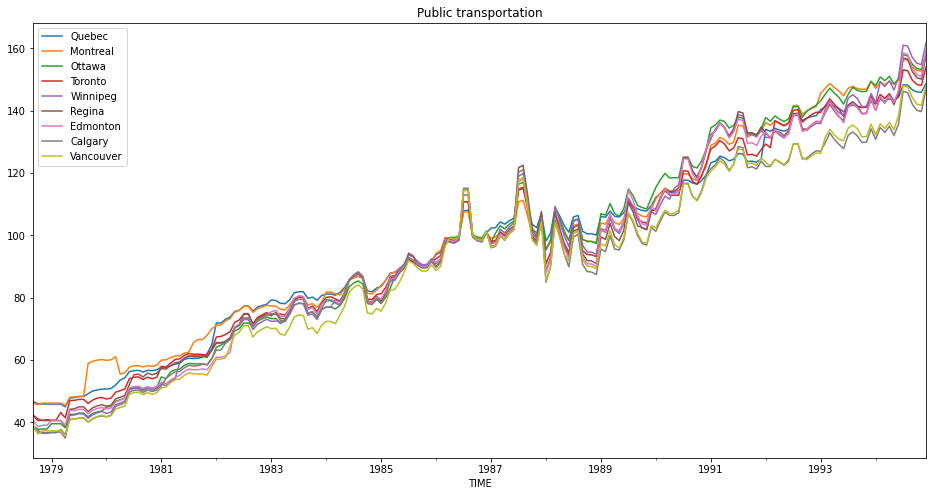

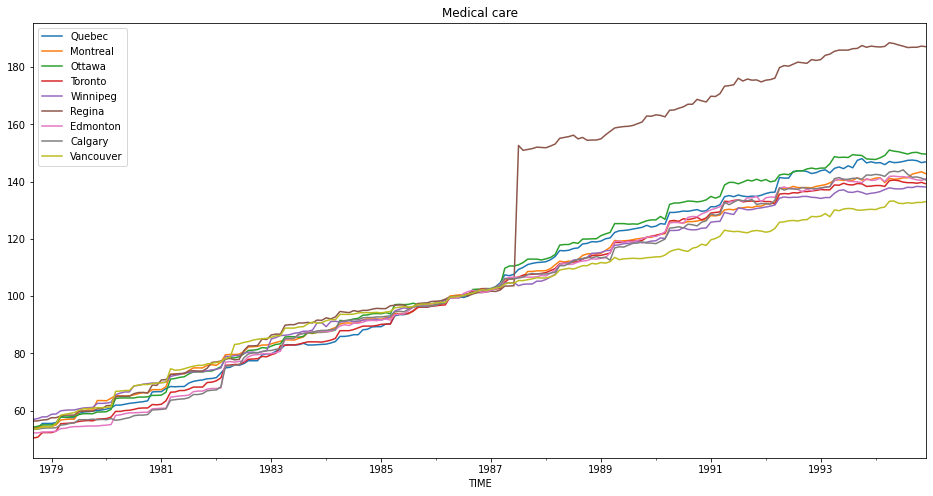

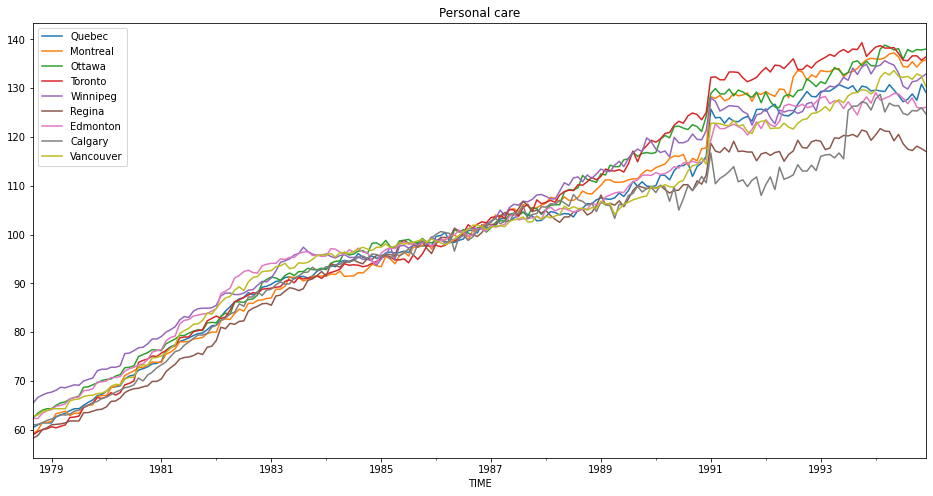

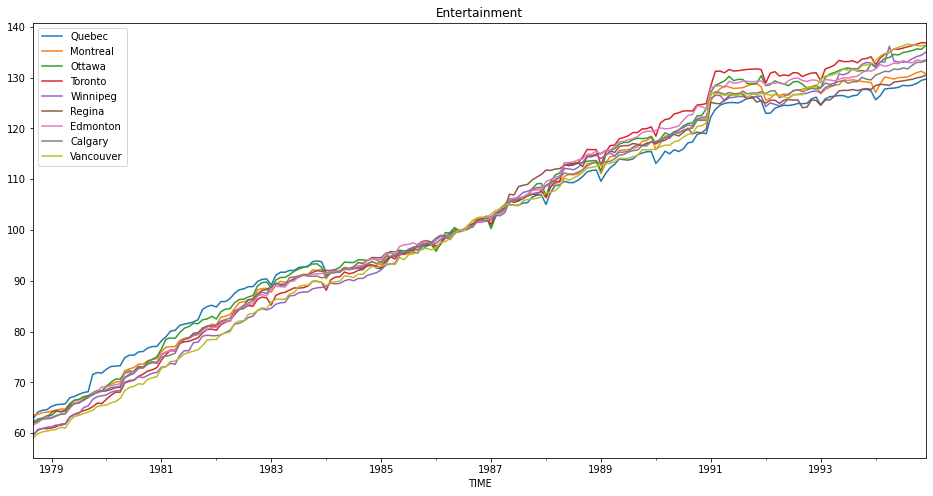

In [36]:
############################################ Plot per sector #################################################
good_codes = [str(i) for i in range(1,15)]

for good_sector in good_codes:
    
    good_cols = []
    for col in can_df.columns:
        number_code = re.findall(r'\d+', col)
        if (number_code):
            if ((re.findall(r'\d+', col)[0])==good_sector):
                good_cols.append(col)
    good_cols = ['TIME'] + good_cols
    
    df_goods = can_df[good_cols]
    
    # rename goods_code into the full description
    for i in range(0,df_goods.shape[1]):
        current_col = df_goods.columns[i]
        df_goods = df_goods.rename(columns = {current_col:columns_descriptor(current_col)[1]})
    
    df_goods.set_index('TIME').plot(title = goods_descriptions[good_sector], figsize = (16,8))
    plt.legend(loc=2, prop={'size': 10})

### Correlation Map Between Goods <a class="anchor" id="can_cg"></a>

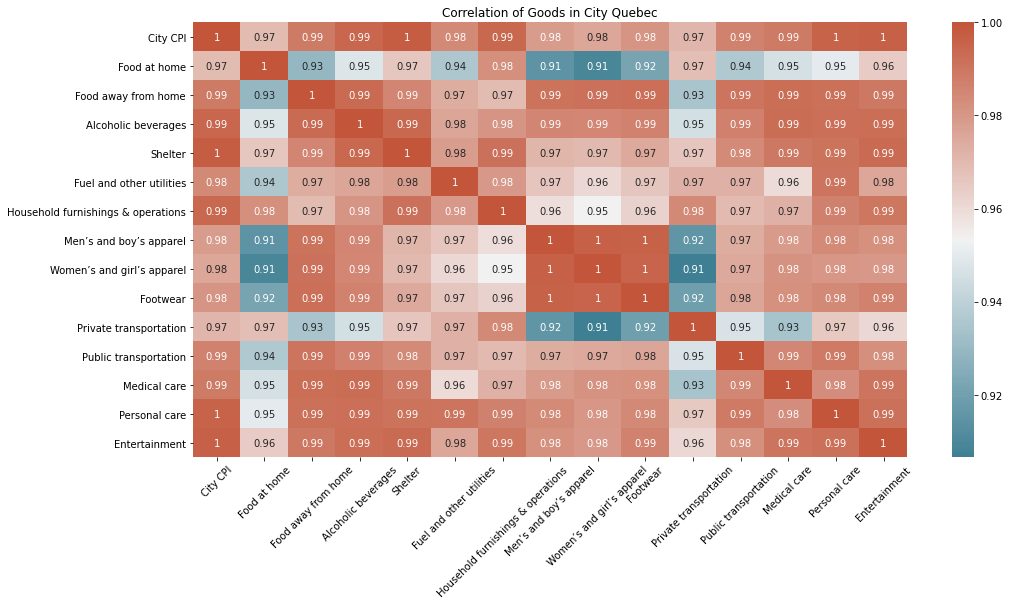

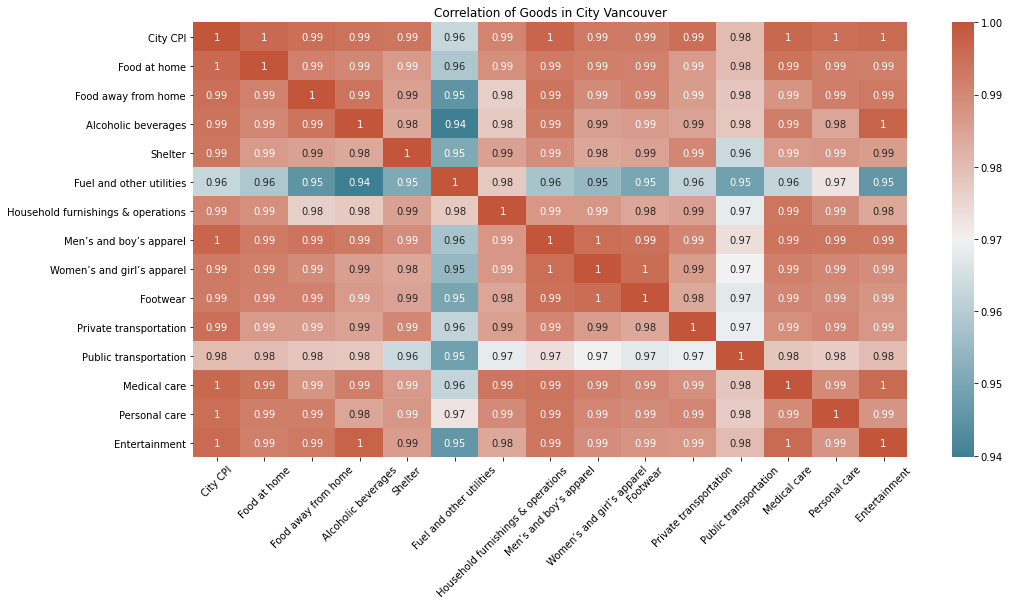

In [55]:
city_codes = ['Q','V']
for city_code in city_codes:
    city_cols = [col for col in can_df.columns if city_code[0] in col]
    goods_cols = [columns_descriptor(col)[0] for col in city_cols if city_code[0] in col]
    time_city_cols = ['TIME']+city_cols
    df_city = can_df[time_city_cols]

    # rename goods_code into the full description
    for i in range(0,df_city.shape[1]):
        current_col = df_city.columns[i]
        df_city = df_city.rename(columns = {current_col:columns_descriptor(current_col)[0]})
        
    fig, ax = plt.subplots(figsize=(16,8))
    ax = plt.axes()
    corr = df_city.corr()# plot the heatmap
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
    ax.set_title('Correlation of Goods in City '+ city_names[city_code])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Boxplot<a class="anchor" id="can_bp"></a>

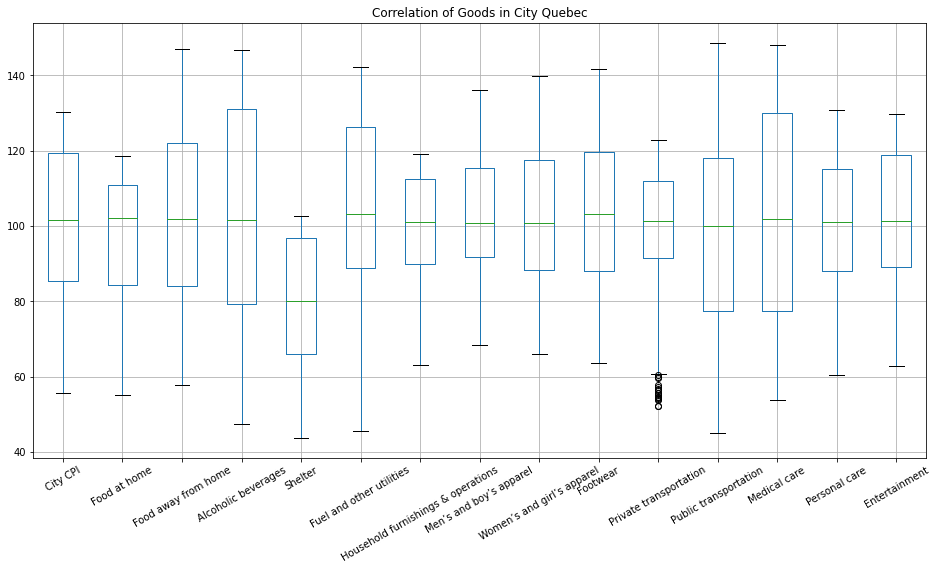

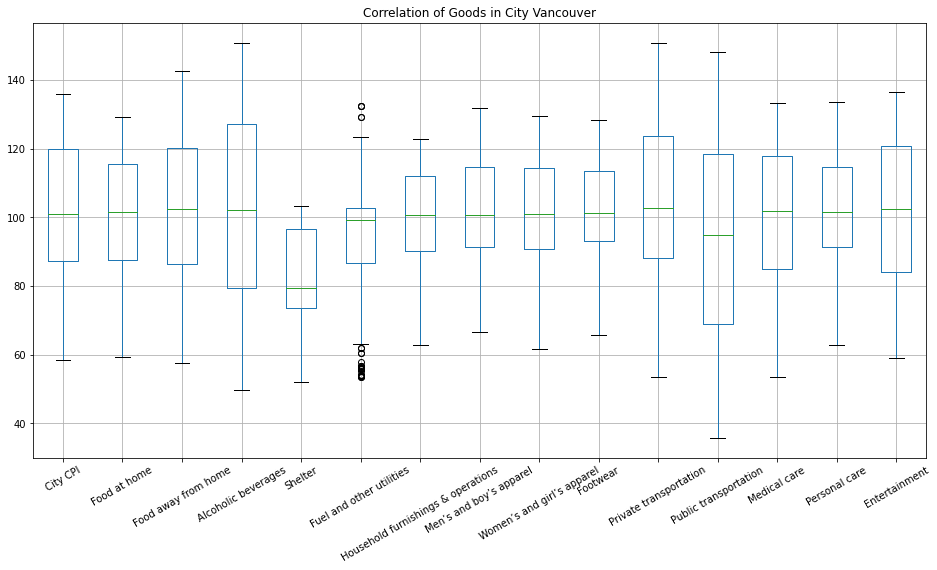

In [39]:
city_codes = ['Q','V']
for city_code in city_codes:
    city_cols = [col for col in can_df.columns if city_code[0] in col]
    goods_cols = [columns_descriptor(col)[0] for col in city_cols if city_code[0] in col]
    time_city_cols = ['TIME']+city_cols
    df_city = can_df[time_city_cols]

    # rename goods_code into the full description
    for i in range(0,df_city.shape[1]):
        current_col = df_city.columns[i]
        df_city = df_city.rename(columns = {current_col:columns_descriptor(current_col)[0]})
        
    fig, ax = plt.subplots(figsize=(16,8))
    ax = plt.axes()
    corr = df_city.corr()# plot the heatmap
    df_city.boxplot()
    ax.set_title('Correlation of Goods in City '+ city_names[city_code])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
